<h2>Installing Necessary Libraries</h2>

In [1]:
pip install autots

Note: you may need to restart the kernel to use updated packages.


<h2> Importing Libraries</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import autots as AutoTS

<h2> Loading Data</h2>

In [3]:
data=pd.read_csv("wipro.csv")

In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,30-05-2024,436.95,449.0,449.50,435.1,10.36M,-3.07%
1,29-05-2024,450.80,454.0,455.50,449.5,4.88M,-1.15%
2,28-05-2024,456.05,454.0,457.25,453.1,7.89M,0.80%
3,27-05-2024,452.45,462.0,462.15,451.6,20.49M,-2.42%
4,24-05-2024,463.65,467.0,470.50,462.0,4.10M,-0.46%


In [5]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1070,04-02-2020,240.25,239.00,241.25,237.90,3.16M,1.20%
1071,03-02-2020,237.40,237.70,240.15,235.25,4.23M,0.25%
1072,01-02-2020,236.80,236.75,239.30,234.30,2.10M,0.00%
1073,31-01-2020,236.80,238.00,239.15,235.00,5.55M,-1.62%
1074,30-01-2020,240.70,247.60,247.60,240.20,2.15M,-2.45%


<h2> Data Preprocessing</h2>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1075 non-null   object 
 1   Price     1075 non-null   float64
 2   Open      1075 non-null   float64
 3   High      1075 non-null   float64
 4   Low       1075 non-null   float64
 5   Vol.      1075 non-null   object 
 6   Change %  1075 non-null   object 
dtypes: float64(4), object(3)
memory usage: 58.9+ KB


In [7]:
#We will pick only close column to predict our stock price 
data = data[["Date", "Price"]]

In [8]:
data["Date"] = pd.to_datetime(data.Date)

C:\Users\premkumar\AppData\Local\Temp\ipykernel_41828\139315313.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Date"] = pd.to_datetime(data.Date)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1075 non-null   datetime64[ns]
 1   Price   1075 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.9 KB


<h3>handling Missing Values</h3>

In [27]:
data["Price"].isnull().sum()

0

In [28]:
data["Date"].isnull().sum()

0

In [ ]:
#There is no missing values in our data , Even if missing values are present our model will automatically handles it .
#But it is better practice to handle missing values manually .

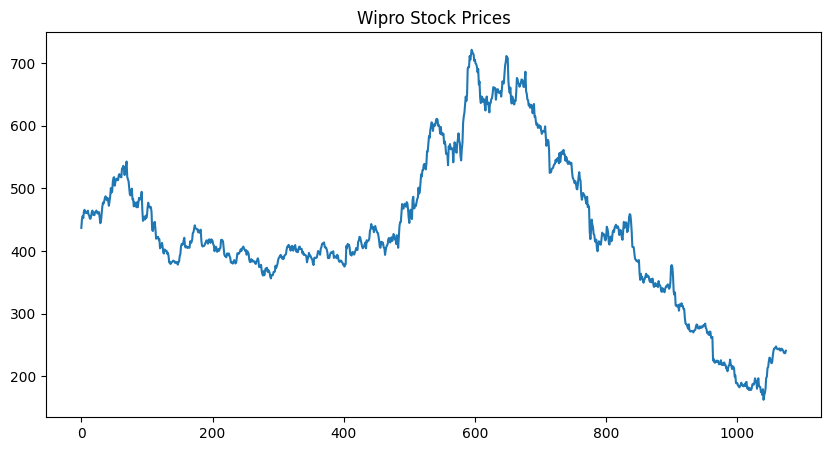

In [10]:
#Plotting data 
data["Price"].plot(figsize=(10,5),title="Wipro Stock Prices",label="Close Price")
plt.show()

<h3>Training Model</h3>

In [15]:
from autots import AutoTS
model = AutoTS(
    forecast_length=5,  # Predict the next 5 periods
    frequency='infer',  # Automatically detect the data frequency
    prediction_interval=0.9,  # Use a 90% confidence interval for predictions
    ensemble='auto',  # Use ensemble methods
    model_list="default",  # Use a wider range of models
    transformer_list="fast",  # Use a predefined list of fast transformers
    drop_most_recent=1,  # Drop the most recent data point when training
    max_generations=5,  # Increase to 5 generations
    num_validations=3,  # Increase to 3 validation splits
    validation_method="backwards"  # Use backward chaining for validation
)
model = model.fit(data, date_col='Date', value_col='Price', id_col=None)

Using 2 cpus for n_jobs.
Data frequency is: None, used frequency is: None
Frequency is 'None'! Data frequency not recognized.
Model Number: 1 with model ARIMA in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model AverageValueNaive in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 6 with model DatepartRegression in generation 0 of 5
Model Number: 7 with model DatepartRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 8 with model DatepartRegression in generation 0 of 5
Epoch 1/50


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4163
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4097
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4107
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4088
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4079
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4076
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4085
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4076
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4083
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4071
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4078
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4072
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4069
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4075
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4061
Epoch 16/50
50/50 ━━━━━━━━━━━━

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 11 with model GLM in generation 0 of 5
Model Number: 12 with model GLM in generation 0 of 5
Model Number: 13 with model GLS in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 14 with model GLS in generation 0 of 5
Model Number: 15 with model LastValueNaive in generation 0 of 5
Model Number: 16 with model LastValueNaive in generation 0 of 5
Model Number: 17 with model LastValueNaive in generation 0 of 5
Model Number: 18 with model LastValueNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 19 with model SeasonalNaive in generation 0 of 5
Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params rolling_mean_24 {'0': {}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {}}") in model 19 in generation 0: SeasonalNaive
Model Number: 20 with model SeasonalNaive in generation 0 of 5
Model Number: 21 with model SeasonalNaive in generation 0 of 5
Model Number: 22 with model UnobservedComponents in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:3412: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 23 with model UnobservedComponents in generation 0 of 5
Model Number: 24 with model UnobservedComponents in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 25 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 25 in generation 0: VAR
Model Number: 26 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 26 in generation 0: VAR
Model Number: 27 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 27 in generation 0: VECM
Model Number: 28 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 28 in generation 0: VECM
Model Number: 29 with model WindowRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 30 with model ConstantNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 31 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 31 in generation 0: FBProphet
Model Number: 32 with model MultivariateRegression in generation 0 of 5
Model Number: 33 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 36 with model DatepartRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 37 with model UnobservedComponents in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 38 with model UnobservedComponents in generation 0 of 5
Model Number: 39 with model ETS in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 40 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 40 in generation 0: VECM
Model Number: 41 with model ARDL in generation 0 of 5
Model Number: 42 with model MultivariateMotif in generation 0 of 5
Model Number: 43 with model MultivariateMotif in generation 0 of 5
Model Number: 44 with model UnivariateMotif in generation 0 of 5
Model Number: 45 with model UnivariateMotif in generation 0 of 5
Model Number: 46 with model SectionalMotif in generation 0 of 5
Model Number: 47 with model SectionalMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 48 with model MultivariateRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 49 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 49 in generation 0: FBProphet
Model Number: 50 with model SeasonalNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 51 with model DatepartRegression in generation 0 of 5
Model Number: 52 with model NVAR in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 53 with model Theta in generation 0 of 5
Model Number: 54 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 54 in generation 0: ARCH
Model Number: 55 with model Cassandra in generation 0 of 5
Model Number: 56 with model SeasonalityMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype 

Model Number: 57 with model Cassandra in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 58 with model Cassandra in generation 0 of 5
FillNA method `pad` not known, returning original


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 59 with model Cassandra in generation 0 of 5
Model Number: 60 with model DMD in generation 0 of 5
Model Number: 61 with model DMD in generation 0 of 5
Model Number: 62 with model ConstantNaive in generation 0 of 5
Model Number: 63 with model LastValueNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 64 with model AverageValueNaive in generation 0 of 5
Model Number: 65 with model GLS in generation 0 of 5
Model Number: 66 with model SeasonalNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 67 with model GLM in generation 0 of 5
Model Number: 68 with model ETS in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 69 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model UnobservedComponents in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 71 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 71 in generation 0: VAR
Model Number: 72 with model VECM in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 72 in generation 0: VECM
Model Number: 73 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 73 in generation 0: ARIMA
Model Number: 74 with model WindowRegression in generation 0 of 5
Model Number: 75 with model DatepartRegression in generation 0 of 5
Model Number: 76 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 76 in generation 0: MultivariateRegression
Model Number: 77 with model UnivariateMotif in generation 0 of 5
Model Number: 78 with model MultivariateMotif in generation 0 of 5
Templ

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 81 with model Theta in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 82 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 82 in generation 0: ARDL
Model Number: 83 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 83 in generation 0: ARCH
Model Number: 84 with model MetricMotif in generation 0 of 5
Model Number: 85 with model SeasonalityMotif in generation 0 of 5
Model Number: 86 with model DMD in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 87 with model RRVAR in generation 0 of 5
Model Number: 88 with model FFT in generation 0 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '2': {}, '3': {}, '4': {'window_size': 30, 'alpha': 2.0, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}, '5': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}}") in model 88 in generation 0: FFT
Model Number: 89 with model Cassandra in generation 0 of 5
Model Number: 90 with model SeasonalityMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 91 with model SeasonalityMotif in generation 0 of 5
Model Number: 92 with model AverageValueNaive in generation 0 of 5
Model Number: 93 with model ConstantNaive in generation 0 of 5
Model Number: 94 with model SectionalMotif in generation 0 of 5
Model Number: 95 with model UnivariateMotif in generation 0 of 5
Model Number: 96 with model SectionalMotif in generation 0 of 5
Model Number: 97 with model NVAR in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 98 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 98 in generation 0: VAR
Model Number: 99 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 99 in generation 0: VAR
Model Number: 100 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 100 in generation 0: ARCH
Model Number: 101 with model FFT in generation 0 of 5
Model Number: 102 with model ARDL in generation 0 of 5
Model Number: 103 with model SeasonalityMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 104 with model SeasonalityMotif in generation 0 of 5
Model Number: 105 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 105 in generation 0: VAR
Model Number: 106 with model DatepartRegression in generation 0 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 106 in generation 0: DatepartRegression
Model Number: 107 with model WindowRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 107 in generation 0: WindowRegression
Model Number: 108 with 

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 112 with model Theta in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 113 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 113 in generation 0: VAR
Model Number: 114 with model MultivariateMotif in generation 0 of 5
Model Number: 115 with model SeasonalityMotif in generation 0 of 5
Model Number: 116 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 116 in generation 0: ARCH
Model Number: 117 with model SeasonalityMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 118 with model ARIMA in generation 0 of 5
Model Number: 119 with model WindowRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 119 in generation 0: WindowRegression
Model Number: 120 with model SectionalMotif in generation 0 of 5
Model Number: 121 with model DatepartRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 122 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 122 in generation 0: DatepartRegression
Model Number: 123 with model UnivariateMotif in generation 0 of 5
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.1}}}}}, 'isolated_only': False}, '1': {'lag': 1, 'fill': 'one'}, '2': {'lag_1': 7, 'method': 'LastValue'}, '3': {'discretization': 'upper', 'n_bins': 5}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold':

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 128 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 128 in generation 0: DatepartRegression
Model Number: 129 with model Cassandra in generation 0 of 5
Template Eval Error: IndexError('positional indexers are out-of-bounds') in model 129 in generation 0: Cassandra
Model Number: 130 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 130 in generation 0: ARCH
Model Number: 131 with model Theta in generation 0 of 5
Model Number: 132 with model SectionalMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 133 with model Theta in generation 0 of 5
Model Number: 134 with model SeasonalNaive in generation 0 of 5
Model Number: 135 with model SeasonalityMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 136 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 136 in generation 0: GLM
Model Number: 137 with model MetricMotif in generation 0 of 5
Model Number: 138 with model Cassandra in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value e

Model Number: 139 with model SeasonalityMotif in generation 0 of 5
Model Number: 140 with model SeasonalityMotif in generation 0 of 5
Model Number: 141 with model GLS in generation 0 of 5
Model Number: 142 with model RRVAR in generation 0 of 5
Model Number: 143 with model ConstantNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 144 with model GLS in generation 0 of 5
Model Number: 145 with model DatepartRegression in generation 0 of 5

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(



Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 145 in generation 0: DatepartRegression
Model Number: 146 with model UnobservedComponents in generation 0 of 5
Model Number: 147 with model UnobservedComponents in generation 0 of 5
Model Number: 148 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 148 in generation 0: ARDL
Model Number: 149 with model LastValueNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 150 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 150 in generation 0: VAR
Model Number: 151 with model AverageValueNaive in generation 0 of 5
Model Number: 152 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 152 in generation 0: VAR
Model Number: 153 with model UnobservedComponents in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 154 with model Theta in generation 0 of 5
Model Number: 155 with model GLS in generation 0 of 5
Model Number: 156 with model GLS in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 157 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 157 in generation 0: VECM
Model Number: 158 with model LastValueNaive in generation 0 of 5
Model Number: 159 with model FBProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 159 in generation 0: FBProphet
Model Number: 160 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 160 in generation 0: VECM
Model Number: 161 with model VECM in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 161 in generation 0: VECM
Model Number: 162 with model LastValueNaive in generation 0 of 5
Model Number: 163 with model WindowRegression in generation 0 of 5
Model Number: 164 with model NVAR in generation 0 of 5
Model Number: 165 with model MultivariateMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 166 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 166 in generation 0: VECM
Model Number: 167 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 167 in generation 0: DatepartRegression
Model Number: 168 with model GLM in generation 0 of 5
Model Number: 169 with model SeasonalityMotif in generation 0 of 5
Model Number: 170 with model ETS in generation 0 of 5
Model Number: 171 with model DatepartRegression in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 172 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 172 in generation 0: ARCH
Model Number: 173 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 173 in generation 0: GLM
Model Number: 174 with model ConstantNaive in generation 0 of 5
Template Eval Error: Exception("Transformer Detrend failed on fit from params linear {'0': {'method': 'clip', 'std_threshold': 3.5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}},

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 181 with model MetricMotif in generation 0 of 5
Model Number: 182 with model SeasonalityMotif in generation 0 of 5
Model Number: 183 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 183 in generation 0: VECM
Model Number: 184 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 184 in generation 0: UnobservedComponents
Model Number: 185 with model ConstantNaive in generation 0 of 5
Model Number: 186 with model AverageValueNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmo

Model Number: 187 with model GLM in generation 0 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 187 in generation 0: GLM
Model Number: 188 with model ARDL in generation 0 of 5
Model Number: 189 with model GLS in generation 0 of 5
Model Number: 190 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 190 in generation 0: ARDL
Model Number: 191 with model SeasonalityMotif in generation 0 of 5
Model Number: 192 with model LastValueNaive in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 193 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 193 in generation 0: VAR
Model Number: 194 with model ConstantNaive in generation 0 of 5
Model Number: 195 with model Theta in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 196 with model UnobservedComponents in generation 0 of 5
Model Number: 197 with model WindowRegression in generation 0 of 5
Model Number: 198 with model UnivariateMotif in generation 0 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df 

Model Number: 199 with model WindowRegression in generation 0 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}}") in model 199 in generation 0: WindowRegression
Model Number: 200 with model MultivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 200 in generation 0: MultivariateRegression
Model Number: 201 with model RRVAR in generation 0 of 5
New Generation: 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 202 with model Cassandra in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 203 with model ARIMA in generation 1 of 5
Model Number: 204 with model ConstantNaive in generation 1 of 5
Model Number: 205 with model SeasonalityMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 206 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 206 in generation 1: ARDL
Model Number: 207 with model Theta in generation 1 of 5
Model Number: 208 with model LastValueNaive in generation 1 of 5
Model Number: 209 with model WindowRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 209 in generation 1: WindowRegression
Model Number: 210 with model SectionalMotif in generation 1 of 5
Model Number: 211 with model ARIMA in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 212 with model WindowRegression in generation 1 of 5
Model Number: 213 with model NVAR in generation 1 of 5
Model Number: 214 with model GLS in generation 1 of 5
Model Number: 215 with model LastValueNaive in generation 1 of 5
Model Number: 216 with model NVAR in generation 1 of 5
Model Number: 217 with model AverageValueNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 218 with model WindowRegression in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 219 with model GLS in generation 1 of 5
Model Number: 220 with model MetricMotif in generation 1 of 5
Model Number: 221 with model SectionalMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Pytho

Model Number: 222 with model Cassandra in generation 1 of 5
Model Number: 223 with model MetricMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 224 with model UnobservedComponents in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 225 with model UnobservedComponents in generation 1 of 5
Model Number: 226 with model ETS in generation 1 of 5
Model Number: 227 with model LastValueNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 228 with model GLM in generation 1 of 5
Model Number: 229 with model DatepartRegression in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 230 with model ARIMA in generation 1 of 5
Model Number: 231 with model ConstantNaive in generation 1 of 5
Model Number: 232 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {}, '2': {'center': 'mean'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '4': {'lag_1': 7, 'method': 'Mean'}}") in model 232 in generation 1: LastValueNaive
Model Number: 233 with model ConstantNaive in generation 1 of 5
Model Number: 234 with model UnivariateMotif in generation 1 of 5
Model Number: 235 with model NVAR in generation 1 of 5
Model Number: 236 with model MultivariateMotif in generation 1 of 5
Model Number: 237 with model AverageValueNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 238 with model UnobservedComponents in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 239 with model AverageValueNaive in generation 1 of 5
Model Number: 240 with model AverageValueNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 241 with model Cassandra in generation 1 of 5
Model Number: 242 with model NVAR in generation 1 of 5
Model Number: 243 with model DatepartRegression in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 244 with model WindowRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 244 in generation 1: WindowRegression
Model Number: 245 with model Theta in generation 1 of 5
Model Number: 246 with model UnivariateMotif in generation 1 of 5
Model Number: 247 with model MultivariateMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 248 with model LastValueNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 249 with model FFT in generation 1 of 5
Model Number: 250 with model SeasonalNaive in generation 1 of 5
Model Number: 251 with model SectionalMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 252 with model Cassandra in generation 1 of 5
Model Number: 253 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 253 in generation 1: UnobservedComponents
Model Number: 254 with model SeasonalNaive in generation 1 of 5
Model Number: 255 with model SeasonalityMotif in generation 1 of 5
Model Number: 256 with model SeasonalityMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 257 with model Theta in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 258 with model ETS in generation 1 of 5
Model Number: 259 with model UnivariateMotif in generation 1 of 5
Model Number: 260 with model SeasonalNaive in generation 1 of 5
Model Number: 261 with model UnivariateMotif in generation 1 of 5
Model Number: 262 with model ETS in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior

Model Number: 263 with model NVAR in generation 1 of 5
Model Number: 264 with model SectionalMotif in generation 1 of 5
Model Number: 265 with model GLS in generation 1 of 5
Model Number: 266 with model ETS in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 267 with model ConstantNaive in generation 1 of 5
Model Number: 268 with model UnivariateMotif in generation 1 of 5
Model Number: 269 with model SectionalMotif in generation 1 of 5
Model Number: 270 with model MultivariateRegression in generation 1 of 5

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 271 with model ARIMA in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 272 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 272 in generation 1: GLM
Model Number: 273 with model SectionalMotif in generation 1 of 5
Model Number: 274 with model AverageValueNaive in generation 1 of 5
Model Number: 275 with model Cassandra in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1328: RuntimeWarnin

Model Number: 276 with model MultivariateMotif in generation 1 of 5
Model Number: 277 with model UnobservedComponents in generation 1 of 5
Model Number: 278 with model MultivariateMotif in generation 1 of 5
Model Number: 279 with model UnivariateMotif in generation 1 of 5
Model Number: 280 with model MultivariateRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 280 in generation 1: MultivariateRegression
Model Number: 281 with model LastValueNaive in generation 1 of 5
Model Number: 282 with model SectionalMotif in generation 1 of 5
Model Number: 283 with model LastValueNaive in generation 1 of 5
Model Number: 284 with model NVAR in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 285 with model MultivariateMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_opti

Model Number: 286 with model WindowRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 286 in generation 1: WindowRegression
Model Number: 287 with model ConstantNaive in generation 1 of 5
Model Number: 288 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '1': {'lag': 7, 'fill': 'bfill'}, '2': {'low': 12, 'high': 28, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '3': {'lag_1': 7, 'method': 'LastValue'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 288 in generation 1: MetricMotif
Model Number: 289 with model MetricMotif in generation 1 of 5
Model Number: 290 with model Seasonalit

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value e

Model Number: 294 with model ARIMA in generation 1 of 5
Model Number: 295 with model LastValueNaive in generation 1 of 5
Model Number: 296 with model Cassandra in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 297 with model SectionalMotif in generation 1 of 5
Model Number: 298 with model MetricMotif in generation 1 of 5
Model Number: 299 with model DMD in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 300 with model DMD in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 301 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 301 in generation 1: UnobservedComponents
Model Number: 302 with model ConstantNaive in generation 1 of 5
Model Number: 303 with model AverageValueNaive in generation 1 of 5
Model Number: 304 with model FFT in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype 

Model Number: 305 with model ARDL in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 306 with model ARIMA in generation 1 of 5
Model Number: 307 with model MultivariateMotif in generation 1 of 5
Model Number: 308 with model SeasonalityMotif in generation 1 of 5
Model Number: 309 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 309 in generation 1: UnobservedComponents
Model Number: 310 with model AverageValueNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 311 with model Theta in generation 1 of 5
Model Number: 312 with model SeasonalityMotif in generation 1 of 5
Model Number: 313 with model ConstantNaive in generation 1 of 5
Model Number: 314 with model SeasonalNaive in generation 1 of 5
Model Number: 315 with model AverageValueNaive in generation 1 of 5
Model Number: 316 with model AverageValueNaive in generation 1 of 5
Model Number: 317 with model UnivariateMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 318 with model MultivariateRegression in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 319 with model Theta in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 320 with model Theta in generation 1 of 5
Model Number: 321 with model ConstantNaive in generation 1 of 5
Model Number: 322 with model RRVAR in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 323 with model ARDL in generation 1 of 5
Model Number: 324 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 324 in generation 1: DatepartRegression
Model Number: 325 with model SectionalMotif in generation 1 of 5
Model Number: 326 with model DatepartRegression in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 327 with model Cassandra in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 328 with model UnobservedComponents in generation 1 of 5
Model Number: 329 with model MetricMotif in generation 1 of 5
Model Number: 330 with model MetricMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 331 with model MultivariateRegression in generation 1 of 5
Model Number: 332 with model NVAR in generation 1 of 5
Model Number: 333 with model AverageValueNaive in generation 1 of 5
Model Number: 334 with model SectionalMotif in generation 1 of 5
Model Number: 335 with model ConstantNaive in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 336 with model MultivariateMotif in generation 1 of 5
Model Number: 337 with model RRVAR in generation 1 of 5
Model Number: 338 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 338 in generation 1: ARDL
Model Number: 339 with model MultivariateMotif in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 340 with model Cassandra in generation 1 of 5
Model Number: 341 with model GLS in generation 1 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


New Generation: 2 of 5
Model Number: 342 with model UnobservedComponents in generation 2 of 5
Model Number: 343 with model SectionalMotif in generation 2 of 5
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 343 in generation 2: SectionalMotif
Model Number: 344 with model SectionalMotif in generation 2 of 5
Model Number: 345 with model ETS in generation 2 of 5
Model Number: 346 with model SectionalMotif in generation 2 of 5
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 346 in generation 2: SectionalMotif
Model Number: 347 with model SectionalMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 348 with model Cassandra in generation 2 of 5
Model Number: 349 with model ConstantNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 350 with model WindowRegression in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 350 in generation 2: WindowRegression
Model Number: 351 with model Theta in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 352 with model ARIMA in generation 2 of 5
Model Number: 353 with model LastValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 354 with model Theta in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 355 with model MultivariateRegression in generation 2 of 5
Model Number: 356 with model ETS in generation 2 of 5
Model Number: 357 with model MultivariateMotif in generation 2 of 5
Model Number: 358 with model LastValueNaive in generation 2 of 5
Model Number: 359 with model GLS in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 360 with model AverageValueNaive in generation 2 of 5
Model Number: 361 with model MetricMotif in generation 2 of 5
Model Number: 362 with model GLS in generation 2 of 5
Model Number: 363 with model MetricMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 364 with model NVAR in generation 2 of 5
Model Number: 365 with model ConstantNaive in generation 2 of 5
Model Number: 366 with model WindowRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 366 in generation 2: WindowRegression
Model Number: 367 with model AverageValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 368 with model UnobservedComponents in generation 2 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 368 in generation 2: UnobservedComponents
Model Number: 369 with model Cassandra in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 369 in generation 2: Cassandra
Model Number: 370 with model MultivariateRegression in generation 2 of 5
Model Number: 371 with model NVAR in generation 2 of 5
Model Number: 372 with model UnivariateMotif in generation 2 of 5
Model Number: 373 with model UnivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 374 with model ARIMA in generation 2 of 5
Model Number: 375 with model ConstantNaive in generation 2 of 5
Model Number: 376 with model LastValueNaive in generation 2 of 5
Model Number: 377 with model NVAR in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 378 with model Cassandra in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 378 in generation 2: Cassandra
Model Number: 379 with model Cassandra in generation 2 of 5
Template Eval Error: AttributeError("'NoneType' object has no attribute 'scores'") in model 379 in generation 2: Cassandra
Model Number: 380 with model ARIMA in generation 2 of 5
Model Number: 381 with model GLS in generation 2 of 5
Model Number: 382 with model ConstantNaive in generation 2 of 5
Model Number: 383 with model ARIMA in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 384 with model MultivariateMotif in generation 2 of 5
Model Number: 385 with model GLS in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 386 with model SeasonalityMotif in generation 2 of 5
Model Number: 387 with model MetricMotif in generation 2 of 5
Model Number: 388 with model DMD in generation 2 of 5
Model Number: 389 with model SectionalMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 390 with model Cassandra in generation 2 of 5
Model Number: 391 with model MultivariateRegression in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 392 with model FFT in generation 2 of 5
Model Number: 393 with model AverageValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 394 with model NVAR in generation 2 of 5
Model Number: 395 with model ConstantNaive in generation 2 of 5
Model Number: 396 with model ARIMA in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 397 with model RRVAR in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 398 with model RRVAR in generation 2 of 5
Model Number: 399 with model FFT in generation 2 of 5
Model Number: 400 with model SectionalMotif in generation 2 of 5
Model Number: 401 with model AverageValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 402 with model UnobservedComponents in generation 2 of 5
Model Number: 403 with model NVAR in generation 2 of 5
Model Number: 404 with model LastValueNaive in generation 2 of 5
Model Number: 405 with model SectionalMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 406 with model ARIMA in generation 2 of 5
Model Number: 407 with model MetricMotif in generation 2 of 5
Model Number: 408 with model UnivariateMotif in generation 2 of 5
Model Number: 409 with model SectionalMotif in generation 2 of 5
Model Number: 410 with model SectionalMotif in generation 2 of 5
Model Number: 411 with model SeasonalityMotif in generation 2 of 5
Model Number: 412 with model ConstantNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 413 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'bkfilter'}, 'transformation_params': {'0': {}}}}}") in model 413 in generation 2: AverageValueNaive
Model Number: 414 with model MultivariateRegression in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 415 with model LastValueNaive in generation 2 of 5
Model Number: 416 with model DMD in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 417 with model MultivariateRegression in generation 2 of 5
Model Number: 418 with model UnivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.

Model Number: 419 with model Cassandra in generation 2 of 5
Model Number: 420 with model UnivariateMotif in generation 2 of 5
Model Number: 421 with model GLS in generation 2 of 5
Model Number: 422 with model LastValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 423 with model MultivariateRegression in generation 2 of 5
Model Number: 424 with model UnivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 425 with model Theta in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 426 with model Theta in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 427 with model MultivariateRegression in generation 2 of 5
Model Number: 428 with model SectionalMotif in generation 2 of 5
Model Number: 429 with model UnivariateMotif in generation 2 of 5
Model Number: 430 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 430 in generation 2: UnobservedComponents
Model Number: 431 with model DatepartRegression in generation 2 of 5
Model Number: 432 with model SectionalMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 433 with model MultivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 434 with model Cassandra in generation 2 of 5
Model Number: 435 with model SeasonalNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 436 with model Theta in generation 2 of 5
Model Number: 437 with model UnivariateMotif in generation 2 of 5
Model Number: 438 with model DMD in generation 2 of 5
Model Number: 439 with model NVAR in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 440 with model UnobservedComponents in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 441 with model ARIMA in generation 2 of 5
Model Number: 442 with model AverageValueNaive in generation 2 of 5
Model Number: 443 with model UnivariateMotif in generation 2 of 5
Model Number: 444 with model MultivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 445 with model ARIMA in generation 2 of 5
Model Number: 446 with model MultivariateMotif in generation 2 of 5
Model Number: 447 with model MultivariateMotif in generation 2 of 5
Model Number: 448 with model NVAR in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior

Model Number: 449 with model Theta in generation 2 of 5
Model Number: 450 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 450 in generation 2: ARDL
Model Number: 451 with model DMD in generation 2 of 5
Model Number: 452 with model UnobservedComponents in generation 2 of 5
Model Number: 453 with model LastValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 454 with model GLM in generation 2 of 5
Model Number: 455 with model AverageValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 456 with model DatepartRegression in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_regression.py:505: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 456 in generation 2: DatepartRegression
Model Number: 457 with model UnobservedComponents in generation 2 of 5
Model Number: 458 with model GLS in generation 2 of 5
Model Number: 459 with model AverageValueNaive in generation 2 of 5
Model Number: 460 with model UnobservedComponents in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 461 with model SeasonalityMotif in generation 2 of 5
Model Number: 462 with model AverageValueNaive in generation 2 of 5
Model Number: 463 with model AverageValueNaive in generation 2 of 5
Model Number: 464 with model MultivariateRegression in generation 2 of 5

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 465 with model ARIMA in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 466 with model Theta in generation 2 of 5
Model Number: 467 with model UnivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 468 with model MultivariateMotif in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 469 with model UnobservedComponents in generation 2 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 469 in generation 2: UnobservedComponents
Model Number: 470 with model DMD in generation 2 of 5
Model Number: 471 with model MultivariateMotif in generation 2 of 5
Model Number: 472 with model MetricMotif in generation 2 of 5
Model Number: 473 with model RRVAR in generation 2 of 5
Model Number: 474 with model SeasonalNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 475 with model ARIMA in generation 2 of 5
Model Number: 476 with model MetricMotif in generation 2 of 5
Model Number: 477 with model SectionalMotif in generation 2 of 5
Model Number: 478 with model MultivariateMotif in generation 2 of 5
Model Number: 479 with model AverageValueNaive in generation 2 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 480 with model WindowRegression in generation 2 of 5
Model Number: 481 with model DMD in generation 2 of 5
ECR rank is 0


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


New Generation: 3 of 5
Model Number: 482 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 482 in generation 3: ARIMA
Model Number: 483 with model UnivariateMotif in generation 3 of 5
Model Number: 484 with model LastValueNaive in generation 3 of 5
Model Number: 485 with model UnobservedComponents in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 486 with model LastValueNaive in generation 3 of 5
Model Number: 487 with model LastValueNaive in generation 3 of 5
Model Number: 488 with model GLS in generation 3 of 5
Model Number: 489 with model SeasonalNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 490 with model MultivariateRegression in generation 3 of 5
Model Number: 491 with model MultivariateMotif in generation 3 of 5
Model Number: 492 with model NVAR in generation 3 of 5
Model Number: 493 with model LastValueNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 494 with model Cassandra in generation 3 of 5
Model Number: 495 with model SectionalMotif in generation 3 of 5
Model Number: 496 with model ConstantNaive in generation 3 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'bkfilter', '1': 'AlignLastValue', '2': 'bkfilter', '3': 'ScipyFilter'}, 'transformation_params': {'0': {}, '1': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False, 'threshold': 10}, '2': {}, '3': {'method': 'savgol_filter', 'method_args': {'window_length': 7, 'polyorder': 1, 'deriv': 1, 'mode': 'nearest'}}}}. fail_on_forecast_nan=True") in model 496 in generation 3: ConstantNaive
Model Number: 497 with model DMD in generation 3 of 5
Model Number: 498 with model MetricMotif in generation 3 of 5
Model Number: 499 with model ETS in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype 

Model Number: 500 with model MultivariateMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 501 with model UnivariateMotif in generation 3 of 5
Model Number: 502 with model Cassandra in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 503 with model NVAR in generation 3 of 5
Model Number: 504 with model GLM in generation 3 of 5
Model Number: 505 with model GLS in generation 3 of 5
Model Number: 506 with model SeasonalityMotif in generation 3 of 5
Model Number: 507 with model Theta in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 508 with model Theta in generation 3 of 5
Model Number: 509 with model NVAR in generation 3 of 5
Model Number: 510 with model SectionalMotif in generation 3 of 5
Model Number: 511 with model UnivariateMotif in generation 3 of 5
Model Number: 512 with model NVAR in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 513 with model ARIMA in generation 3 of 5
Model Number: 514 with model SeasonalityMotif in generation 3 of 5
Model Number: 515 with model DMD in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 516 with model UnobservedComponents in generation 3 of 5
Model Number: 517 with model SeasonalityMotif in generation 3 of 5
Model Number: 518 with model AverageValueNaive in generation 3 of 5
Model Number: 519 with model AverageValueNaive in generation 3 of 5
Model Number: 520 with model MetricMotif in generation 3 of 5
Model Number: 521 with model ETS in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 522 with model SectionalMotif in generation 3 of 5
Model Number: 523 with model NVAR in generation 3 of 5
Model Number: 524 with model DMD in generation 3 of 5
Model Number: 525 with model UnobservedComponents in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {}, '1': {'lag_1': 7, 'method': 5}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True, 'threshold': 10}, '3': {}}") in model 525 in generation 3: UnobservedComponents
Model Number: 526 with model NVAR in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 527 with model MultivariateRegression in generation 3 of 5
Model Number: 528 with model GLM in generation 3 of 5
Model Number: 529 with model AverageValueNaive in generation 3 of 5
Model Number: 530 with model SeasonalNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 531 with model UnobservedComponents in generation 3 of 5
Model Number: 532 with model ARDL in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 533 with model ARIMA in generation 3 of 5
Model Number: 534 with model MultivariateMotif in generation 3 of 5
Model Number: 535 with model MetricMotif in generation 3 of 5
Model Number: 536 with model SeasonalNaive in generation 3 of 5
Model Number: 537 with model ConstantNaive in generation 3 of 5
Model Number: 538 with model SeasonalityMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python

Model Number: 539 with model GLS in generation 3 of 5
Model Number: 540 with model UnivariateMotif in generation 3 of 5
Model Number: 541 with model SectionalMotif in generation 3 of 5
Model Number: 542 with model SectionalMotif in generation 3 of 5
Model Number: 543 with model UnobservedComponents in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 544 with model RRVAR in generation 3 of 5
Model Number: 545 with model SectionalMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 546 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 546 in generation 3: ARIMA
Model Number: 547 with model SectionalMotif in generation 3 of 5
Model Number: 548 with model LastValueNaive in generation 3 of 5
Model Number: 549 with model UnobservedComponents in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 550 with model ARDL in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 551 with model Theta in generation 3 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}, '1': {}, '2': {'discretization': 'upper', 'n_bins': 10}}") in model 551 in generation 3: Theta
Model Number: 552 with model DMD in generation 3 of 5
Model Number: 553 with model AverageValueNaive in generation 3 of 5
Model Number: 554 with model WindowRegression in generation 3 of 5
Model Number: 555 with model NVAR in generation 3 of 5
Model Number: 556 with model ARDL in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.083e+03, tolerance: 9.312e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide

Model Number: 557 with model SeasonalityMotif in generation 3 of 5
Model Number: 558 with model Cassandra in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 559 with model NVAR in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 560 with model ARIMA in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 561 with model Theta in generation 3 of 5
Model Number: 562 with model MultivariateMotif in generation 3 of 5
Model Number: 563 with model SeasonalityMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 564 with model DMD in generation 3 of 5
Model Number: 565 with model UnivariateMotif in generation 3 of 5
Model Number: 566 with model MultivariateMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 567 with model MetricMotif in generation 3 of 5
Model Number: 568 with model ETS in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 569 with model UnobservedComponents in generation 3 of 5
Model Number: 570 with model AverageValueNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 571 with model UnivariateMotif in generation 3 of 5
Model Number: 572 with model FFT in generation 3 of 5
Model Number: 573 with model UnivariateMotif in generation 3 of 5
Model Number: 574 with model LastValueNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.

Model Number: 575 with model MetricMotif in generation 3 of 5
Model Number: 576 with model UnivariateMotif in generation 3 of 5
Model Number: 577 with model MultivariateMotif in generation 3 of 5
Model Number: 578 with model NVAR in generation 3 of 5
Model Number: 579 with model MetricMotif in generation 3 of 5
Model Number: 580 with model SectionalMotif in generation 3 of 5
Model Number: 581 with model MultivariateMotif in generation 3 of 5
Model Number: 582 with model MetricMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 583 with model DatepartRegression in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 584 with model WindowRegression in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 585 with model ARIMA in generation 3 of 5
Model Number: 586 with model MultivariateMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 587 with model MultivariateMotif in generation 3 of 5
Model Number: 588 with model NVAR in generation 3 of 5
Model Number: 589 with model MetricMotif in generation 3 of 5
Model Number: 590 with model MultivariateMotif in generation 3 of 5
Model Number: 591 with model SectionalMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 592 with model MultivariateMotif in generation 3 of 5
Model Number: 593 with model Theta in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 594 with model UnobservedComponents in generation 3 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 594 in generation 3: UnobservedComponents
Model Number: 595 with model Theta in generation 3 of 5
Model Number: 596 with model AverageValueNaive in generation 3 of 5
Model Number: 597 with model MetricMotif in generation 3 of 5
Model Number: 598 with model NVAR in generation 3 of 5
Model Number: 599 with model SeasonalityMotif in generation 3 of 5
Model Number: 600 with model LastValueNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 601 with model MetricMotif in generation 3 of 5
Model Number: 602 with model UnobservedComponents in generation 3 of 5
Model Number: 603 with model MultivariateMotif in generation 3 of 5
Model Number: 604 with model SeasonalityMotif in generation 3 of 5
Model Number: 605 with model SeasonalityMotif in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 606 with model ARDL in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 607 with model DatepartRegression in generation 3 of 5
Epoch 1/50


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Template Eval Error: InvalidArgumentError() in model 607 in generation 3: DatepartRegression
Model Number: 608 with model AverageValueNaive in generation 3 of 5
Model Number: 609 with model Cassandra in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 610 with model MultivariateMotif in generation 3 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params akima {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 1}}") in model 610 in generation 3: MultivariateMotif
Model Number: 611 with model Cassandra in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 612 with model ConstantNaive in generation 3 of 5
Model Number: 613 with model LastValueNaive in generation 3 of 5
Model Number: 614 with model GLS in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 615 with model Theta in generation 3 of 5
Model Number: 616 with model GLM in generation 3 of 5
Model Number: 617 with model AverageValueNaive in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 618 with model MetricMotif in generation 3 of 5
Model Number: 619 with model Cassandra in generation 3 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 620 with model UnivariateMotif in generation 3 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': True, 'threshold': None}, '2': {'lag_1': 12, 'method': 'LastValue'}, '3': {}, '4': {}}") in model 620 in generation 3: UnivariateMotif
Model Number: 621 with model WindowRegression in generation 3 of 5
New Generation: 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 622 with model GLS in generation 4 of 5
Model Number: 623 with model ARIMA in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 624 with model NVAR in generation 4 of 5
Model Number: 625 with model WindowRegression in generation 4 of 5
Model Number: 626 with model DMD in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 627 with model GLS in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 628 with model MultivariateMotif in generation 4 of 5
Model Number: 629 with model FFT in generation 4 of 5
Model Number: 630 with model SectionalMotif in generation 4 of 5
Model Number: 631 with model DMD in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 632 with model MetricMotif in generation 4 of 5
Model Number: 633 with model ARIMA in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 634 with model Cassandra in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 635 with model MultivariateRegression in generation 4 of 5
Model Number: 636 with model ETS in generation 4 of 5
Model Number: 637 with model AverageValueNaive in generation 4 of 5
Model Number: 638 with model MetricMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python

Model Number: 639 with model ARIMA in generation 4 of 5
Model Number: 640 with model NVAR in generation 4 of 5
Model Number: 641 with model Cassandra in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 642 with model MetricMotif in generation 4 of 5
Model Number: 643 with model ConstantNaive in generation 4 of 5
Model Number: 644 with model MultivariateMotif in generation 4 of 5
Model Number: 645 with model AverageValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 646 with model FFT in generation 4 of 5
Model Number: 647 with model ARDL in generation 4 of 5
Model Number: 648 with model UnivariateMotif in generation 4 of 5
Model Number: 649 with model AverageValueNaive in generation 4 of 5
Model Number: 650 with model DatepartRegression in generation 4 of 5
Model Number: 651 with model MultivariateMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 652 with model ARIMA in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 653 with model MultivariateRegression in generation 4 of 5
Model Number: 654 with model UnivariateMotif in generation 4 of 5
Model Number: 655 with model Cassandra in generation 4 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 655 in generation 4: Cassandra
Model Number: 656 with model DMD in generation 4 of 5
Model Number: 657 with model SectionalMotif in generation 4 of 5
Model Number: 658 with model GLS in generation 4 of 5
Model Number: 659 with model UnivariateMotif in generation 4 of 5
Model Number: 660 with model SectionalMotif in generation 4 of 5

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\


Model Number: 661 with model AverageValueNaive in generation 4 of 5
Model Number: 662 with model DMD in generation 4 of 5
Model Number: 663 with model MultivariateRegression in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 664 with model MetricMotif in generation 4 of 5
Model Number: 665 with model NVAR in generation 4 of 5
Model Number: 666 with model MetricMotif in generation 4 of 5
Model Number: 667 with model SeasonalityMotif in generation 4 of 5
Model Number: 668 with model MetricMotif in generation 4 of 5
Template Eval Error: ZeroDivisionError("Weights sum to zero, can't be normalized") in model 668 in generation 4: MetricMotif
Model Number: 669 with model LastValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 670 with model AverageValueNaive in generation 4 of 5
Model Number: 671 with model DMD in generation 4 of 5
Model Number: 672 with model MultivariateRegression in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 673 with model Cassandra in generation 4 of 5
Template Eval Error: Exception("Transformer PCA failed on fit from params None {'0': {'whiten': False}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}}") in model 673 in generation 4: Cassandra
Model Number: 674 with model AverageValueNaive in generation 4 of 5
Model Number: 675 with model Cassandra in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 676 with model LastValueNaive in generation 4 of 5
Model Number: 677 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 677 in generation 4: UnobservedComponents
Model Number: 678 with model LastValueNaive in generation 4 of 5
Model Number: 679 with model UnivariateMotif in generation 4 of 5
Model Number: 680 with model MultivariateMotif in generation 4 of 5
Model Number: 681 with model SectionalMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 682 with model Cassandra in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 683 with model Theta in generation 4 of 5
Model Number: 684 with model MultivariateMotif in generation 4 of 5
Model Number: 685 with model UnivariateMotif in generation 4 of 5
Model Number: 686 with model LastValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 687 with model ARIMA in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 688 with model MetricMotif in generation 4 of 5
Model Number: 689 with model UnivariateMotif in generation 4 of 5
Model Number: 690 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 690 in generation 4: ARDL
Model Number: 691 with model UnivariateMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 692 with model Theta in generation 4 of 5
Model Number: 693 with model LastValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 694 with model ARIMA in generation 4 of 5
Model Number: 695 with model UnivariateMotif in generation 4 of 5
Model Number: 696 with model AverageValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 697 with model ARIMA in generation 4 of 5
Model Number: 698 with model GLM in generation 4 of 5
Model Number: 699 with model ConstantNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 700 with model MultivariateRegression in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 701 with model FFT in generation 4 of 5
Model Number: 702 with model SeasonalityMotif in generation 4 of 5
Model Number: 703 with model MultivariateMotif in generation 4 of 5
Model Number: 704 with model SeasonalNaive in generation 4 of 5
Model Number: 705 with model SectionalMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 706 with model LastValueNaive in generation 4 of 5
Model Number: 707 with model MultivariateMotif in generation 4 of 5
Model Number: 708 with model RRVAR in generation 4 of 5
Model Number: 709 with model SectionalMotif in generation 4 of 5
Model Number: 710 with model NVAR in generation 4 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 713 with model Theta in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 714 with model SeasonalityMotif in generation 4 of 5
Model Number: 715 with model NVAR in generation 4 of 5
Model Number: 716 with model ETS in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 717 with model Cassandra in generation 4 of 5
Model Number: 718 with model SectionalMotif in generation 4 of 5
Model Number: 719 with model MetricMotif in generation 4 of 5
Model Number: 720 with model ConstantNaive in generation 4 of 5
Model Number: 721 with model MetricMotif in generation 4 of 5
Model Number: 722 with model LastValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 723 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 723 in generation 4: ARIMA
Model Number: 724 with model AverageValueNaive in generation 4 of 5
Model Number: 725 with model SeasonalityMotif in generation 4 of 5
Model Number: 726 with model MultivariateMotif in generation 4 of 5
Model Number: 727 with model Cassandra in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 728 with model ARIMA in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 729 with model ARIMA in generation 4 of 5
Model Number: 730 with model NVAR in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 731 with model Theta in generation 4 of 5
Model Number: 732 with model ConstantNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 733 with model Theta in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 734 with model RRVAR in generation 4 of 5
Model Number: 735 with model UnivariateMotif in generation 4 of 5
Model Number: 736 with model SeasonalityMotif in generation 4 of 5
Model Number: 737 with model SeasonalityMotif in generation 4 of 5
Model Number: 738 with model SeasonalityMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 739 with model AverageValueNaive in generation 4 of 5
Model Number: 740 with model SectionalMotif in generation 4 of 5
Model Number: 741 with model AverageValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 742 with model ARDL in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 743 with model ARDL in generation 4 of 5
Model Number: 744 with model ETS in generation 4 of 5
Model Number: 745 with model NVAR in generation 4 of 5
Model Number: 746 with model SeasonalityMotif in generation 4 of 5
Model Number: 747 with model AverageValueNaive in generation 4 of 5
Model Number: 748 with model ConstantNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 749 with model Cassandra in generation 4 of 5
Model Number: 750 with model MultivariateMotif in generation 4 of 5
Model Number: 751 with model WindowRegression in generation 4 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 751 in generation 4: WindowRegression
Model Number: 752 with model GLS in generation 4 of 5
Model Number: 753 with model DatepartRegression in generation 4 of 5
Model Number: 754 with model AverageValueNaive in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 755 with model NVAR in generation 4 of 5
Model Number: 756 with model SectionalMotif in generation 4 of 5
Model Number: 757 with model Cassandra in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 757 in generation 4: Cassandra
Model Number: 758 with model UnobservedComponents in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 759 with model Theta in generation 4 of 5
Model Number: 760 with model MultivariateMotif in generation 4 of 5
Model Number: 761 with model UnivariateMotif in generation 4 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


New Generation: 5 of 5
Model Number: 762 with model UnivariateMotif in generation 5 of 5
Model Number: 763 with model NVAR in generation 5 of 5
Model Number: 764 with model MetricMotif in generation 5 of 5
Model Number: 765 with model MetricMotif in generation 5 of 5
Model Number: 766 with model MetricMotif in generation 5 of 5
Model Number: 767 with model SeasonalNaive in generation 5 of 5
Model Number: 768 with model AverageValueNaive in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 769 with model RRVAR in generation 5 of 5
Model Number: 770 with model MultivariateRegression in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 771 with model SeasonalNaive in generation 5 of 5
Model Number: 772 with model ConstantNaive in generation 5 of 5
Model Number: 773 with model AverageValueNaive in generation 5 of 5
Model Number: 774 with model MultivariateMotif in generation 5 of 5
Model Number: 775 with model RRVAR in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 776 with model MetricMotif in generation 5 of 5
Model Number: 777 with model Cassandra in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 778 with model Theta in generation 5 of 5
Model Number: 779 with model SeasonalNaive in generation 5 of 5
Model Number: 780 with model MultivariateMotif in generation 5 of 5
Model Number: 781 with model MetricMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 782 with model ARIMA in generation 5 of 5
Model Number: 783 with model SeasonalityMotif in generation 5 of 5
Model Number: 784 with model AverageValueNaive in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 785 with model Theta in generation 5 of 5
Model Number: 786 with model DMD in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 787 with model UnobservedComponents in generation 5 of 5
Model Number: 788 with model SectionalMotif in generation 5 of 5
Model Number: 789 with model GLS in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 790 with model AverageValueNaive in generation 5 of 5
Model Number: 791 with model MetricMotif in generation 5 of 5
Model Number: 792 with model MultivariateMotif in generation 5 of 5
Model Number: 793 with model AverageValueNaive in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 794 with model MultivariateRegression in generation 5 of 5
Model Number: 795 with model GLS in generation 5 of 5
Model Number: 796 with model MultivariateMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 797 with model Theta in generation 5 of 5
Model Number: 798 with model MetricMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 799 with model ConstantNaive in generation 5 of 5
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'lag': 7, 'fill': 'bfill'}, '2': {'fixed': True, 'window': 360, 'macro_micro': True, 'center': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10}}") in model 799 in generation 5: ConstantNaive
Model Number: 800 with model MultivariateRegression in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 801 with model AverageValueNaive in generation 5 of 5
Model Number: 802 with model SeasonalityMotif in generation 5 of 5
Model Number: 803 with model Cassandra in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 804 with model MultivariateMotif in generation 5 of 5
Model Number: 805 with model MultivariateMotif in generation 5 of 5
Model Number: 806 with model Cassandra in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 807 with model ARIMA in generation 5 of 5
Model Number: 808 with model Cassandra in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 809 with model LastValueNaive in generation 5 of 5
Model Number: 810 with model SectionalMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 811 with model RRVAR in generation 5 of 5
Model Number: 812 with model SeasonalityMotif in generation 5 of 5
Model Number: 813 with model UnivariateMotif in generation 5 of 5
Model Number: 814 with model UnivariateMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 815 with model UnobservedComponents in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 816 with model MetricMotif in generation 5 of 5
Model Number: 817 with model SectionalMotif in generation 5 of 5
Model Number: 818 with model UnivariateMotif in generation 5 of 5
Template Eval Error: Exception("Transformer MaxAbsScaler failed on fit from params rolling_mean {'0': {'lag_1': 7, 'method': 'LastValue'}, '1': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'fake_date', 'transform_dict': {'fillna': 'rolling_mean', 'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {'lag': 2, 'fill': 'zero'}}}, 'isolated_only': False}, '2': {}}") in model 818 in generation 5: UnivariateMotif
Model Number: 819 with model SeasonalityMotif in generation 5 of 5
Model Number: 820 with model SectionalMotif in generation 5 of 5
Model Number: 821 with model LastValueNaive in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 822 with model Theta in generation 5 of 5
Model Number: 823 with model MetricMotif in generation 5 of 5
Model Number: 824 with model Theta in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 825 with model UnivariateMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 826 with model ARIMA in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 826 in generation 5: ARIMA
Model Number: 827 with model Cassandra in generation 5 of 5
Model Number: 828 with model NVAR in generation 5 of 5
Model Number: 829 with model LastValueNaive in generation 5 of 5
Model Number: 830 with model SeasonalityMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 831 with model WindowRegression in generation 5 of 5
Model Number: 832 with model ConstantNaive in generation 5 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10}}}. fail_on_forecast_nan=True") in model 832 in generation 5: ConstantNaive
Model Number: 833 with model GLS in generation 5 of 5
Model Number: 834 with model Cassandra in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5472: FutureWarning: Downcasting object dtype 

Model Number: 835 with model NVAR in generation 5 of 5
Model Number: 836 with model ARDL in generation 5 of 5
Model Number: 837 with model SectionalMotif in generation 5 of 5
Model Number: 838 with model SectionalMotif in generation 5 of 5
Model Number: 839 with model UnivariateMotif in generation 5 of 5
Model Number: 840 with model AverageValueNaive in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 841 with model ARDL in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 841 in generation 5: ARDL
Model Number: 842 with model ConstantNaive in generation 5 of 5
Model Number: 843 with model LastValueNaive in generation 5 of 5
Model Number: 844 with model NVAR in generation 5 of 5
Model Number: 845 with model NVAR in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.76561e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 846 with model MetricMotif in generation 5 of 5
Model Number: 847 with model Cassandra in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 848 with model ETS in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 849 with model Theta in generation 5 of 5
Model Number: 850 with model GLS in generation 5 of 5
Model Number: 851 with model ETS in generation 5 of 5
Model Number: 852 with model SectionalMotif in generation 5 of 5
Model Number: 853 with model MultivariateMotif in generation 5 of 5
Model Number: 854 with model UnivariateMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

Model Number: 855 with model SeasonalityMotif in generation 5 of 5
Model Number: 856 with model UnobservedComponents in generation 5 of 5
Model Number: 857 with model DMD in generation 5 of 5
Model Number: 858 with model MultivariateRegression in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 859 with model LastValueNaive in generation 5 of 5
Model Number: 860 with model AverageValueNaive in generation 5 of 5
Model Number: 861 with model MetricMotif in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 862 with model MetricMotif in generation 5 of 5
Model Number: 863 with model ARIMA in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 864 with model WindowRegression in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 865 with model MultivariateRegression in generation 5 of 5
Model Number: 866 with model WindowRegression in generation 5 of 5
Model Number: 867 with model GLS in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 868 with model Cassandra in generation 5 of 5
Model Number: 869 with model ARDL in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)


Model Number: 870 with model LastValueNaive in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 871 with model MultivariateRegression in generation 5 of 5
Model Number: 872 with model NVAR in generation 5 of 5
Model Number: 873 with model GLS in generation 5 of 5


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 874 with model Ensemble in generation 6 of Ensembles
Model Number: 875 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 876 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 877 with model Ensemble in generation 6 of Ensembles
Model Number: 878 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 879 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 880 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 881 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 882 with model Ensemble in generation 6 of Ensembles
Model Number: 883 with model Ensemble in generation 6 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Validation Round: 1
Model Number: 1 of 133 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 1 - Ensemble with avg smape 2.57: 
Model Number: 2 of 133 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 2 - Ensemble with avg smape 2.56: 
Model Number: 3 of 133 with model Ensemble for Validation 1
3 - Ensemble with avg smape 2.57: 
Model Number: 4 of 133 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


4 - Ensemble with avg smape 2.87: 
Model Number: 5 of 133 with model SectionalMotif for Validation 1
5 - SectionalMotif with avg smape 3.06: 
Model Number: 6 of 133 with model SectionalMotif for Validation 1
6 - SectionalMotif with avg smape 3.06: 
Model Number: 7 of 133 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


7 - Ensemble with avg smape 3.06: 
Model Number: 8 of 133 with model SectionalMotif for Validation 1
8 - SectionalMotif with avg smape 3.06: 
Model Number: 9 of 133 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 9 - Ensemble with avg smape 2.47: 
Model Number: 10 of 133 with model Cassandra for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Cassandra with avg smape 2.47: 
Model Number: 11 of 133 with model Cassandra for Validation 1
📈 11 - Cassandra with avg smape 2.04: 
Model Number: 12 of 133 with model AverageValueNaive for Validation 1
12 - AverageValueNaive with avg smape 2.4: 
Model Number: 13 of 133 with model NVAR for Validation 1
13 - NVAR with avg smape 2.18: 
Model Number: 14 of 133 with model AverageValueNaive for Validation 1
14 - AverageValueNaive with avg smape 2.47: 
Model Number: 15 of 133 with model AverageValueNaive for Validation 1
15 - AverageValueNaive with avg smape 2.47: 
Model Number: 16 of 133 with model AverageValueNaive for Validation 1
16 - AverageValueNaive with avg smape 2.47: 
Model Number: 17 of 133 with model AverageValueNaive for Validation 1
17 - AverageValueNaive with avg smape 2.47: 
Model Number: 18 of 133 with model AverageValueNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

18 - AverageValueNaive with avg smape 2.47: 
Model Number: 19 of 133 with model NVAR for Validation 1
19 - NVAR with avg smape 3.26: 
Model Number: 20 of 133 with model MetricMotif for Validation 1
20 - MetricMotif with avg smape 2.53: 
Model Number: 21 of 133 with model LastValueNaive for Validation 1
21 - LastValueNaive with avg smape 2.27: 
Model Number: 22 of 133 with model LastValueNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


22 - LastValueNaive with avg smape 3.09: 
Model Number: 23 of 133 with model Cassandra for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


23 - Cassandra with avg smape 2.38: 
Model Number: 24 of 133 with model LastValueNaive for Validation 1
📈 24 - LastValueNaive with avg smape 0.73: 
Model Number: 25 of 133 with model Cassandra for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


25 - Cassandra with avg smape 1.39: 

C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(



Model Number: 26 of 133 with model GLS for Validation 1
26 - GLS with avg smape 2.46: 
Model Number: 27 of 133 with model UnivariateMotif for Validation 1
📈 27 - UnivariateMotif with avg smape 0.46: 
Model Number: 28 of 133 with model UnivariateMotif for Validation 1
28 - UnivariateMotif with avg smape 0.46: 
Model Number: 29 of 133 with model UnivariateMotif for Validation 1
29 - UnivariateMotif with avg smape 0.79: 
Model Number: 30 of 133 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 0.54: 
Model Number: 31 of 133 with model MetricMotif for Validation 1
31 - MetricMotif with avg smape 0.75: 
Model Number: 32 of 133 with model MetricMotif for Validation 1
32 - MetricMotif with avg smape 1.44: 
Model Number: 33 of 133 with model SectionalMotif for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

33 - SectionalMotif with avg smape 2.03: 
Model Number: 34 of 133 with model UnivariateMotif for Validation 1
34 - UnivariateMotif with avg smape 0.53: 
Model Number: 35 of 133 with model Theta for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


35 - Theta with avg smape 3.34: 
Model Number: 36 of 133 with model Theta for Validation 1
36 - Theta with avg smape 3.34: 
Model Number: 37 of 133 with model MultivariateMotif for Validation 1
37 - MultivariateMotif with avg smape 0.74: 
Model Number: 38 of 133 with model UnivariateMotif for Validation 1
38 - UnivariateMotif with avg smape 1.19: 
Model Number: 39 of 133 with model MetricMotif for Validation 1
39 - MetricMotif with avg smape 1.17: 
Model Number: 40 of 133 with model ConstantNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


40 - ConstantNaive with avg smape 2.98: 
Model Number: 41 of 133 with model ConstantNaive for Validation 1
41 - ConstantNaive with avg smape 2.98: 
Model Number: 42 of 133 with model MultivariateMotif for Validation 1
42 - MultivariateMotif with avg smape 0.93: 
Model Number: 43 of 133 with model SeasonalityMotif for Validation 1
43 - SeasonalityMotif with avg smape 1.03: 
Model Number: 44 of 133 with model LastValueNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

44 - LastValueNaive with avg smape 3.33: 
Model Number: 45 of 133 with model NVAR for Validation 1
45 - NVAR with avg smape 3.83: 
Model Number: 46 of 133 with model SeasonalityMotif for Validation 1
46 - SeasonalityMotif with avg smape 1.07: 
Model Number: 47 of 133 with model MultivariateMotif for Validation 1
47 - MultivariateMotif with avg smape 1.49: 
Model Number: 48 of 133 with model MultivariateRegression for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


48 - MultivariateRegression with avg smape 0.96: 
Model Number: 49 of 133 with model MultivariateMotif for Validation 1
49 - MultivariateMotif with avg smape 0.58: 
Model Number: 50 of 133 with model MetricMotif for Validation 1
50 - MetricMotif with avg smape 1.85: 
Model Number: 51 of 133 with model MetricMotif for Validation 1
51 - MetricMotif with avg smape 2.93: 
Model Number: 52 of 133 with model UnobservedComponents for Validation 1
📈 52 - UnobservedComponents with avg smape 0.39: 
Model Number: 53 of 133 with model MultivariateMotif for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

53 - MultivariateMotif with avg smape 0.68: 
Model Number: 54 of 133 with model SectionalMotif for Validation 1
54 - SectionalMotif with avg smape 0.79: 
Model Number: 55 of 133 with model MultivariateMotif for Validation 1
55 - MultivariateMotif with avg smape 1.12: 
Model Number: 56 of 133 with model SectionalMotif for Validation 1
56 - SectionalMotif with avg smape 0.69: 
Model Number: 57 of 133 with model Cassandra for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


57 - Cassandra with avg smape 2.22: 
Model Number: 58 of 133 with model SeasonalityMotif for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


58 - SeasonalityMotif with avg smape 1.16: 
Model Number: 59 of 133 with model Cassandra for Validation 1
59 - Cassandra with avg smape 2.1: 
Model Number: 60 of 133 with model NVAR for Validation 1
60 - NVAR with avg smape 1.48: 
Model Number: 61 of 133 with model NVAR for Validation 1
61 - NVAR with avg smape 1.12: 
Model Number: 62 of 133 with model UnobservedComponents for Validation 1
62 - UnobservedComponents with avg smape 4.45: 
Model Number: 63 of 133 with model NVAR for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

63 - NVAR with avg smape 1.48: 
Model Number: 64 of 133 with model SeasonalityMotif for Validation 1
64 - SeasonalityMotif with avg smape 1.15: 
Model Number: 65 of 133 with model SeasonalityMotif for Validation 1
65 - SeasonalityMotif with avg smape 0.85: 
Model Number: 66 of 133 with model MultivariateRegression for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


66 - MultivariateRegression with avg smape 0.7: 
Model Number: 67 of 133 with model SeasonalityMotif for Validation 1
67 - SeasonalityMotif with avg smape 0.99: 
Model Number: 68 of 133 with model ConstantNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


68 - ConstantNaive with avg smape 1.13: 
Model Number: 69 of 133 with model WindowRegression for Validation 1
69 - WindowRegression with avg smape 1.34: 
Model Number: 70 of 133 with model GLS for Validation 1
70 - GLS with avg smape 2.86: 
Model Number: 71 of 133 with model SeasonalNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


71 - SeasonalNaive with avg smape 0.45: 
Model Number: 72 of 133 with model ARIMA for Validation 1
72 - ARIMA with avg smape 0.95: 
Model Number: 73 of 133 with model LastValueNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


73 - LastValueNaive with avg smape 1.55: 
Model Number: 74 of 133 with model WindowRegression for Validation 1
74 - WindowRegression with avg smape 2.37: 
Model Number: 75 of 133 with model GLS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


75 - GLS with avg smape 1.71: 
Model Number: 76 of 133 with model ARIMA for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


76 - ARIMA with avg smape 0.83: 
Model Number: 77 of 133 with model MultivariateRegression for Validation 1
77 - MultivariateRegression with avg smape 4.31: 
Model Number: 78 of 133 with model LastValueNaive for Validation 1
78 - LastValueNaive with avg smape 0.73: 
Model Number: 79 of 133 with model GLS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


79 - GLS with avg smape 0.77: 
Model Number: 80 of 133 with model ARIMA for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


80 - ARIMA with avg smape 0.42: 
Model Number: 81 of 133 with model ARIMA for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


81 - ARIMA with avg smape 0.54: 
Model Number: 82 of 133 with model UnobservedComponents for Validation 1
82 - UnobservedComponents with avg smape 0.63: 
Model Number: 83 of 133 with model WindowRegression for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.695e+03, tolerance: 9.123e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


83 - WindowRegression with avg smape 1.97: 
Model Number: 84 of 133 with model ARIMA for Validation 1
84 - ARIMA with avg smape 0.4: 
Model Number: 85 of 133 with model ConstantNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


85 - ConstantNaive with avg smape 1.82: 
Model Number: 86 of 133 with model MultivariateRegression for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


86 - MultivariateRegression with avg smape 0.39: 
Model Number: 87 of 133 with model ARIMA for Validation 1
87 - ARIMA with avg smape 0.75: 
Model Number: 88 of 133 with model SeasonalNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


88 - SeasonalNaive with avg smape 0.49: 
Model Number: 89 of 133 with model UnobservedComponents for Validation 1
89 - UnobservedComponents with avg smape 4.97: 
Model Number: 90 of 133 with model SeasonalNaive for Validation 1
90 - SeasonalNaive with avg smape 0.57: 
Model Number: 91 of 133 with model ARDL for Validation 1
91 - ARDL with avg smape 0.43: 
Model Number: 92 of 133 with model UnobservedComponents for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


92 - UnobservedComponents with avg smape 4.19: 
Model Number: 93 of 133 with model UnobservedComponents for Validation 1
93 - UnobservedComponents with avg smape 200.0: 
Model Number: 94 of 133 with model ConstantNaive for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


94 - ConstantNaive with avg smape 0.63: 
Model Number: 95 of 133 with model Theta for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


95 - Theta with avg smape 4.47: 
Model Number: 96 of 133 with model MultivariateRegression for Validation 1
96 - MultivariateRegression with avg smape 0.44: 
Model Number: 97 of 133 with model GLS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


97 - GLS with avg smape 1.36: 
Model Number: 98 of 133 with model MultivariateRegression for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


98 - MultivariateRegression with avg smape 0.45: 
Model Number: 99 of 133 with model Theta for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


99 - Theta with avg smape 0.41: 
Model Number: 100 of 133 with model Theta for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


100 - Theta with avg smape 0.41: 
Model Number: 101 of 133 with model Theta for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


101 - Theta with avg smape 0.39: 
Model Number: 102 of 133 with model FFT for Validation 1
102 - FFT with avg smape 1.54: 
Model Number: 103 of 133 with model GLS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


103 - GLS with avg smape 0.53: 
Model Number: 104 of 133 with model ARDL for Validation 1
104 - ARDL with avg smape 0.4: 
Model Number: 105 of 133 with model DMD for Validation 1
105 - DMD with avg smape 0.56: 
Model Number: 106 of 133 with model DMD for Validation 1
106 - DMD with avg smape 0.63: 
Model Number: 107 of 133 with model DMD for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


107 - DMD with avg smape 0.39: 
Model Number: 108 of 133 with model ARDL for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 108 - ARDL with avg smape 0.37: 
Model Number: 109 of 133 with model ARDL for Validation 1
109 - ARDL with avg smape 0.81: 
Model Number: 110 of 133 with model ARDL for Validation 1
110 - ARDL with avg smape 1.0: 
Model Number: 111 of 133 with model DMD for Validation 1
111 - DMD with avg smape 1.02: 
Model Number: 112 of 133 with model DMD for Validation 1
112 - DMD with avg smape 1.02: 
Model Number: 113 of 133 with model DMD for Validation 1
113 - DMD with avg smape 1.45: 
Model Number: 114 of 133 with model ETS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

114 - ETS with avg smape 2.71: 
Model Number: 115 of 133 with model FFT for Validation 1
115 - FFT with avg smape 0.39: 
Model Number: 116 of 133 with model FFT for Validation 1
116 - FFT with avg smape 0.39: 
Model Number: 117 of 133 with model ConstantNaive for Validation 1
117 - ConstantNaive with avg smape 1.06: 
Model Number: 118 of 133 with model ARDL for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


118 - ARDL with avg smape 1.12: 
Model Number: 119 of 133 with model RRVAR for Validation 1
119 - RRVAR with avg smape 4.31: 
Model Number: 120 of 133 with model FFT for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


120 - FFT with avg smape 2.5: 
Model Number: 121 of 133 with model WindowRegression for Validation 1
121 - WindowRegression with avg smape 4.75: 
Model Number: 122 of 133 with model ETS for Validation 1
122 - ETS with avg smape 0.39: 
Model Number: 123 of 133 with model ETS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


123 - ETS with avg smape 73.11: 
Model Number: 124 of 133 with model RRVAR for Validation 1
124 - RRVAR with avg smape 0.62: 
Model Number: 125 of 133 with model FFT for Validation 1
125 - FFT with avg smape 5.55: 
Model Number: 126 of 133 with model ETS for Validation 1
126 - ETS with avg smape 0.9: 
Model Number: 127 of 133 with model WindowRegression for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


127 - WindowRegression with avg smape 0.51: 
Model Number: 128 of 133 with model WindowRegression for Validation 1
128 - WindowRegression with avg smape 1.43: 
Model Number: 129 of 133 with model ETS for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


129 - ETS with avg smape 3.21: 
Model Number: 130 of 133 with model RRVAR for Validation 1
130 - RRVAR with avg smape 1.18: 
Model Number: 131 of 133 with model RRVAR for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


131 - RRVAR with avg smape 1.12: 
Model Number: 132 of 133 with model RRVAR for Validation 1
132 - RRVAR with avg smape 1.07: 
Model Number: 133 of 133 with model RRVAR for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


133 - RRVAR with avg smape 0.95: 
Validation Round: 2
Model Number: 1 of 133 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 1 - Ensemble with avg smape 3.13: 
Model Number: 2 of 133 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


2 - Ensemble with avg smape 3.15: 
Model Number: 3 of 133 with model Ensemble for Validation 2
3 - Ensemble with avg smape 3.13: 
Model Number: 4 of 133 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 4 - Ensemble with avg smape 2.94: 
Model Number: 5 of 133 with model SectionalMotif for Validation 2
📈 5 - SectionalMotif with avg smape 2.51: 
Model Number: 6 of 133 with model SectionalMotif for Validation 2
6 - SectionalMotif with avg smape 2.51: 
Model Number: 7 of 133 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


7 - Ensemble with avg smape 2.51: 
Model Number: 8 of 133 with model SectionalMotif for Validation 2
8 - SectionalMotif with avg smape 2.51: 
Model Number: 9 of 133 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 3.33: 
Model Number: 10 of 133 with model Cassandra for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Cassandra with avg smape 3.8: 
Model Number: 11 of 133 with model Cassandra for Validation 2
11 - Cassandra with avg smape 4.03: 
Model Number: 12 of 133 with model AverageValueNaive for Validation 2
📈 12 - AverageValueNaive with avg smape 1.93: 
Model Number: 13 of 133 with model NVAR for Validation 2
13 - NVAR with avg smape 3.09: 
Model Number: 14 of 133 with model AverageValueNaive for Validation 2
14 - AverageValueNaive with avg smape 3.8: 
Model Number: 15 of 133 with model AverageValueNaive for Validation 2
15 - AverageValueNaive with avg smape 3.8: 
Model Number: 16 of 133 with model AverageValueNaive for Validation 2
16 - AverageValueNaive with avg smape 3.8: 
Model Number: 17 of 133 with model AverageValueNaive for Validation 2
17 - AverageValueNaive with avg smape 3.8: 
Model Number: 18 of 133 with model AverageValueNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

18 - AverageValueNaive with avg smape 3.8: 
Model Number: 19 of 133 with model NVAR for Validation 2
19 - NVAR with avg smape 3.73: 
Model Number: 20 of 133 with model MetricMotif for Validation 2
20 - MetricMotif with avg smape 2.4: 
Model Number: 21 of 133 with model LastValueNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.8086e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


21 - LastValueNaive with avg smape 3.31: 
Model Number: 22 of 133 with model LastValueNaive for Validation 2
22 - LastValueNaive with avg smape 3.4: 
Model Number: 23 of 133 with model Cassandra for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future beha

23 - Cassandra with avg smape 4.14: 
Model Number: 24 of 133 with model LastValueNaive for Validation 2
24 - LastValueNaive with avg smape 4.07: 
Model Number: 25 of 133 with model Cassandra for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


25 - Cassandra with avg smape 2.95: 
Model Number: 26 of 133 with model GLS for Validation 2
📈 26 - GLS with avg smape 1.47: 
Model Number: 27 of 133 with model UnivariateMotif for Validation 2
27 - UnivariateMotif with avg smape 1.63: 
Model Number: 28 of 133 with model UnivariateMotif for Validation 2
28 - UnivariateMotif with avg smape 1.63: 
Model Number: 29 of 133 with model UnivariateMotif for Validation 2
📈 29 - UnivariateMotif with avg smape 0.54: 
Model Number: 30 of 133 with model UnivariateMotif for Validation 2
📈 30 - UnivariateMotif with avg smape 0.41: 
Model Number: 31 of 133 with model MetricMotif for Validation 2
31 - MetricMotif with avg smape 0.73: 
Model Number: 32 of 133 with model MetricMotif for Validation 2
32 - MetricMotif with avg smape 1.1: 
Model Number: 33 of 133 with model SectionalMotif for Validation 2
33 - SectionalMotif with avg smape 1.12: 
Model Number: 34 of 133 with model UnivariateMotif for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

34 - UnivariateMotif with avg smape 0.43: 
Model Number: 35 of 133 with model Theta for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


35 - Theta with avg smape 4.17: 
Model Number: 36 of 133 with model Theta for Validation 2
36 - Theta with avg smape 4.17: 
Model Number: 37 of 133 with model MultivariateMotif for Validation 2
37 - MultivariateMotif with avg smape 0.63: 
Model Number: 38 of 133 with model UnivariateMotif for Validation 2
38 - UnivariateMotif with avg smape 1.31: 
Model Number: 39 of 133 with model MetricMotif for Validation 2
39 - MetricMotif with avg smape 1.34: 
Model Number: 40 of 133 with model ConstantNaive for Validation 2
40 - ConstantNaive with avg smape 2.73: 
Model Number: 41 of 133 with model ConstantNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

41 - ConstantNaive with avg smape 2.73: 
Model Number: 42 of 133 with model MultivariateMotif for Validation 2
📈 42 - MultivariateMotif with avg smape 0.38: 
Model Number: 43 of 133 with model SeasonalityMotif for Validation 2
43 - SeasonalityMotif with avg smape 0.59: 
Model Number: 44 of 133 with model LastValueNaive for Validation 2
44 - LastValueNaive with avg smape 2.9: 
Model Number: 45 of 133 with model NVAR for Validation 2
45 - NVAR with avg smape 1.79: 
Model Number: 46 of 133 with model SeasonalityMotif for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


46 - SeasonalityMotif with avg smape 0.98: 
Model Number: 47 of 133 with model MultivariateMotif for Validation 2
47 - MultivariateMotif with avg smape 1.26: 
Model Number: 48 of 133 with model MultivariateRegression for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


48 - MultivariateRegression with avg smape 1.4: 
Model Number: 49 of 133 with model MultivariateMotif for Validation 2
📈 49 - MultivariateMotif with avg smape 0.3: 
Model Number: 50 of 133 with model MetricMotif for Validation 2
50 - MetricMotif with avg smape 3.74: 
Model Number: 51 of 133 with model MetricMotif for Validation 2
51 - MetricMotif with avg smape 3.75: 
Model Number: 52 of 133 with model UnobservedComponents for Validation 2
52 - UnobservedComponents with avg smape 1.24: 
Model Number: 53 of 133 with model MultivariateMotif for Validation 2
53 - MultivariateMotif with avg smape 1.6: 
Model Number: 54 of 133 with model SectionalMotif for Validation 2
54 - SectionalMotif with avg smape 0.43: 
Model Number: 55 of 133 with model MultivariateMotif for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

55 - MultivariateMotif with avg smape 0.65: 
Model Number: 56 of 133 with model SectionalMotif for Validation 2
56 - SectionalMotif with avg smape 0.47: 
Model Number: 57 of 133 with model Cassandra for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


57 - Cassandra with avg smape 2.81: 
Model Number: 58 of 133 with model SeasonalityMotif for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


58 - SeasonalityMotif with avg smape 0.61: 
Model Number: 59 of 133 with model Cassandra for Validation 2
59 - Cassandra with avg smape 2.58: 
Model Number: 60 of 133 with model NVAR for Validation 2
60 - NVAR with avg smape 2.99: 
Model Number: 61 of 133 with model NVAR for Validation 2
61 - NVAR with avg smape 1.88: 
Model Number: 62 of 133 with model UnobservedComponents for Validation 2
62 - UnobservedComponents with avg smape 2.83: 
Model Number: 63 of 133 with model NVAR for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

63 - NVAR with avg smape 2.99: 
Model Number: 64 of 133 with model SeasonalityMotif for Validation 2
64 - SeasonalityMotif with avg smape 0.81: 
Model Number: 65 of 133 with model SeasonalityMotif for Validation 2
65 - SeasonalityMotif with avg smape 0.9: 
Model Number: 66 of 133 with model MultivariateRegression for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


66 - MultivariateRegression with avg smape 1.1: 
Model Number: 67 of 133 with model SeasonalityMotif for Validation 2
67 - SeasonalityMotif with avg smape 1.8: 
Model Number: 68 of 133 with model ConstantNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


68 - ConstantNaive with avg smape 2.1: 
Model Number: 69 of 133 with model WindowRegression for Validation 2
69 - WindowRegression with avg smape 0.43: 
Model Number: 70 of 133 with model GLS for Validation 2
70 - GLS with avg smape 6.34: 
Model Number: 71 of 133 with model SeasonalNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


71 - SeasonalNaive with avg smape 1.24: 
Model Number: 72 of 133 with model ARIMA for Validation 2
72 - ARIMA with avg smape 1.31: 
Model Number: 73 of 133 with model LastValueNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


73 - LastValueNaive with avg smape 0.88: 
Model Number: 74 of 133 with model WindowRegression for Validation 2
74 - WindowRegression with avg smape 0.75: 
Model Number: 75 of 133 with model GLS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


75 - GLS with avg smape 1.48: 
Model Number: 76 of 133 with model ARIMA for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


76 - ARIMA with avg smape 0.63: 
Model Number: 77 of 133 with model MultivariateRegression for Validation 2
77 - MultivariateRegression with avg smape 2.26: 
Model Number: 78 of 133 with model LastValueNaive for Validation 2
78 - LastValueNaive with avg smape 1.0: 
Model Number: 79 of 133 with model GLS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


79 - GLS with avg smape 1.44: 
Model Number: 80 of 133 with model ARIMA for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


80 - ARIMA with avg smape 1.29: 
Model Number: 81 of 133 with model ARIMA for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


81 - ARIMA with avg smape 1.39: 
Model Number: 82 of 133 with model UnobservedComponents for Validation 2
82 - UnobservedComponents with avg smape 1.81: 
Model Number: 83 of 133 with model WindowRegression for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e+03, tolerance: 9.182e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


83 - WindowRegression with avg smape 2.85: 
Model Number: 84 of 133 with model ARIMA for Validation 2
84 - ARIMA with avg smape 1.66: 
Model Number: 85 of 133 with model ConstantNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


85 - ConstantNaive with avg smape 1.88: 
Model Number: 86 of 133 with model MultivariateRegression for Validation 2
86 - MultivariateRegression with avg smape 0.7: 
Model Number: 87 of 133 with model ARIMA for Validation 2
87 - ARIMA with avg smape 1.03: 
Model Number: 88 of 133 with model SeasonalNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


88 - SeasonalNaive with avg smape 0.61: 
Model Number: 89 of 133 with model UnobservedComponents for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


89 - UnobservedComponents with avg smape 5.7: 
Model Number: 90 of 133 with model SeasonalNaive for Validation 2
90 - SeasonalNaive with avg smape 0.37: 
Model Number: 91 of 133 with model ARDL for Validation 2
91 - ARDL with avg smape 1.17: 
Model Number: 92 of 133 with model UnobservedComponents for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


92 - UnobservedComponents with avg smape 2.48: 
Model Number: 93 of 133 with model UnobservedComponents for Validation 2
93 - UnobservedComponents with avg smape 1.14: 
Model Number: 94 of 133 with model ConstantNaive for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


94 - ConstantNaive with avg smape 1.81: 
Model Number: 95 of 133 with model Theta for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


95 - Theta with avg smape 4.85: 
Model Number: 96 of 133 with model MultivariateRegression for Validation 2
96 - MultivariateRegression with avg smape 0.71: 
Model Number: 97 of 133 with model GLS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


97 - GLS with avg smape 0.76: 
Model Number: 98 of 133 with model MultivariateRegression for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


98 - MultivariateRegression with avg smape 3.21: 
Model Number: 99 of 133 with model Theta for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


99 - Theta with avg smape 1.15: 
Model Number: 100 of 133 with model Theta for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


100 - Theta with avg smape 1.15: 
Model Number: 101 of 133 with model Theta for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


101 - Theta with avg smape 1.13: 
Model Number: 102 of 133 with model FFT for Validation 2
102 - FFT with avg smape 1.46: 
Model Number: 103 of 133 with model GLS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


103 - GLS with avg smape 1.34: 
Model Number: 104 of 133 with model ARDL for Validation 2
104 - ARDL with avg smape 1.12: 
Model Number: 105 of 133 with model DMD for Validation 2
105 - DMD with avg smape 1.43: 
Model Number: 106 of 133 with model DMD for Validation 2
106 - DMD with avg smape 1.81: 
Model Number: 107 of 133 with model DMD for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


107 - DMD with avg smape 1.21: 
Model Number: 108 of 133 with model ARDL for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


108 - ARDL with avg smape 1.11: 
Model Number: 109 of 133 with model ARDL for Validation 2
109 - ARDL with avg smape 1.42: 
Model Number: 110 of 133 with model ARDL for Validation 2
110 - ARDL with avg smape 1.24: 
Model Number: 111 of 133 with model DMD for Validation 2
111 - DMD with avg smape 1.21: 
Model Number: 112 of 133 with model DMD for Validation 2
112 - DMD with avg smape 1.21: 
Model Number: 113 of 133 with model DMD for Validation 2
113 - DMD with avg smape 1.41: 
Model Number: 114 of 133 with model ETS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

114 - ETS with avg smape 0.72: 
Model Number: 115 of 133 with model FFT for Validation 2
115 - FFT with avg smape 1.14: 
Model Number: 116 of 133 with model FFT for Validation 2
116 - FFT with avg smape 1.14: 
Model Number: 117 of 133 with model ConstantNaive for Validation 2
117 - ConstantNaive with avg smape 1.14: 
Model Number: 118 of 133 with model ARDL for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


118 - ARDL with avg smape 1.17: 
Model Number: 119 of 133 with model RRVAR for Validation 2
119 - RRVAR with avg smape 1.44: 
Model Number: 120 of 133 with model FFT for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


120 - FFT with avg smape 2.0: 
Model Number: 121 of 133 with model WindowRegression for Validation 2
121 - WindowRegression with avg smape 4.21: 
Model Number: 122 of 133 with model ETS for Validation 2
122 - ETS with avg smape 4.85: 
Model Number: 123 of 133 with model ETS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


123 - ETS with avg smape 36.15: 
Model Number: 124 of 133 with model RRVAR for Validation 2
124 - RRVAR with avg smape 1.26: 
Model Number: 125 of 133 with model FFT for Validation 2
125 - FFT with avg smape 6.56: 
Model Number: 126 of 133 with model ETS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


126 - ETS with avg smape 2.36: 
Model Number: 127 of 133 with model WindowRegression for Validation 2
127 - WindowRegression with avg smape 1.09: 
Model Number: 128 of 133 with model WindowRegression for Validation 2
128 - WindowRegression with avg smape 2.02: 
Model Number: 129 of 133 with model ETS for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


129 - ETS with avg smape 1.34: 
Model Number: 130 of 133 with model RRVAR for Validation 2
130 - RRVAR with avg smape 1.0: 
Model Number: 131 of 133 with model RRVAR for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


131 - RRVAR with avg smape 0.84: 
Model Number: 132 of 133 with model RRVAR for Validation 2
132 - RRVAR with avg smape 0.81: 
Model Number: 133 of 133 with model RRVAR for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


133 - RRVAR with avg smape 0.72: 
Validation Round: 3
Model Number: 1 of 133 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 1 - Ensemble with avg smape 1.27: 
Model Number: 2 of 133 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


2 - Ensemble with avg smape 1.29: 
Model Number: 3 of 133 with model Ensemble for Validation 3
3 - Ensemble with avg smape 1.27: 
Model Number: 4 of 133 with model Ensemble for Validation 3
4 - Ensemble with avg smape 1.27: 
Model Number: 5 of 133 with model SectionalMotif for Validation 3
5 - SectionalMotif with avg smape 1.45: 
Model Number: 6 of 133 with model SectionalMotif for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


6 - SectionalMotif with avg smape 1.45: 
Model Number: 7 of 133 with model Ensemble for Validation 3
7 - Ensemble with avg smape 1.45: 
Model Number: 8 of 133 with model SectionalMotif for Validation 3
8 - SectionalMotif with avg smape 1.45: 
Model Number: 9 of 133 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 1.57: 
Model Number: 10 of 133 with model Cassandra for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Cassandra with avg smape 1.99: 
Model Number: 11 of 133 with model Cassandra for Validation 3
📈 11 - Cassandra with avg smape 1.14: 
Model Number: 12 of 133 with model AverageValueNaive for Validation 3
📈 12 - AverageValueNaive with avg smape 0.41: 
Model Number: 13 of 133 with model NVAR for Validation 3
13 - NVAR with avg smape 1.02: 
Model Number: 14 of 133 with model AverageValueNaive for Validation 3
14 - AverageValueNaive with avg smape 1.99: 
Model Number: 15 of 133 with model AverageValueNaive for Validation 3
15 - AverageValueNaive with avg smape 1.99: 
Model Number: 16 of 133 with model AverageValueNaive for Validation 3
16 - AverageValueNaive with avg smape 1.99: 
Model Number: 17 of 133 with model AverageValueNaive for Validation 3
17 - AverageValueNaive with avg smape 1.99: 
Model Number: 18 of 133 with model AverageValueNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

18 - AverageValueNaive with avg smape 1.99: 
Model Number: 19 of 133 with model NVAR for Validation 3
19 - NVAR with avg smape 1.48: 
Model Number: 20 of 133 with model MetricMotif for Validation 3
20 - MetricMotif with avg smape 0.61: 
Model Number: 21 of 133 with model LastValueNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.83083e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


21 - LastValueNaive with avg smape 1.55: 
Model Number: 22 of 133 with model LastValueNaive for Validation 3
22 - LastValueNaive with avg smape 1.59: 
Model Number: 23 of 133 with model Cassandra for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


23 - Cassandra with avg smape 1.37: 
Model Number: 24 of 133 with model LastValueNaive for Validation 3
24 - LastValueNaive with avg smape 0.64: 
Model Number: 25 of 133 with model Cassandra for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


25 - Cassandra with avg smape 1.34: 
Model Number: 26 of 133 with model GLS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


26 - GLS with avg smape 0.94: 
Model Number: 27 of 133 with model UnivariateMotif for Validation 3
27 - UnivariateMotif with avg smape 1.55: 
Model Number: 28 of 133 with model UnivariateMotif for Validation 3
28 - UnivariateMotif with avg smape 1.55: 
Model Number: 29 of 133 with model UnivariateMotif for Validation 3
29 - UnivariateMotif with avg smape 1.71: 
Model Number: 30 of 133 with model UnivariateMotif for Validation 3
30 - UnivariateMotif with avg smape 2.46: 
Model Number: 31 of 133 with model MetricMotif for Validation 3
31 - MetricMotif with avg smape 1.81: 
Model Number: 32 of 133 with model MetricMotif for Validation 3
32 - MetricMotif with avg smape 2.19: 
Model Number: 33 of 133 with model SectionalMotif for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

33 - SectionalMotif with avg smape 0.95: 
Model Number: 34 of 133 with model UnivariateMotif for Validation 3
34 - UnivariateMotif with avg smape 1.96: 
Model Number: 35 of 133 with model Theta for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


35 - Theta with avg smape 1.91: 
Model Number: 36 of 133 with model Theta for Validation 3
36 - Theta with avg smape 1.91: 
Model Number: 37 of 133 with model MultivariateMotif for Validation 3
37 - MultivariateMotif with avg smape 1.61: 
Model Number: 38 of 133 with model UnivariateMotif for Validation 3
38 - UnivariateMotif with avg smape 3.02: 
Model Number: 39 of 133 with model MetricMotif for Validation 3
39 - MetricMotif with avg smape 1.69: 
Model Number: 40 of 133 with model ConstantNaive for Validation 3
40 - ConstantNaive with avg smape 0.95: 
Model Number: 41 of 133 with model ConstantNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

41 - ConstantNaive with avg smape 0.95: 
Model Number: 42 of 133 with model MultivariateMotif for Validation 3
42 - MultivariateMotif with avg smape 1.27: 
Model Number: 43 of 133 with model SeasonalityMotif for Validation 3
43 - SeasonalityMotif with avg smape 1.65: 
Model Number: 44 of 133 with model LastValueNaive for Validation 3
44 - LastValueNaive with avg smape 0.6: 
Model Number: 45 of 133 with model NVAR for Validation 3
45 - NVAR with avg smape 1.37: 
Model Number: 46 of 133 with model SeasonalityMotif for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


46 - SeasonalityMotif with avg smape 1.78: 
Model Number: 47 of 133 with model MultivariateMotif for Validation 3
47 - MultivariateMotif with avg smape 0.69: 
Model Number: 48 of 133 with model MultivariateRegression for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


48 - MultivariateRegression with avg smape 4.65: 
Model Number: 49 of 133 with model MultivariateMotif for Validation 3
49 - MultivariateMotif with avg smape 2.4: 
Model Number: 50 of 133 with model MetricMotif for Validation 3
50 - MetricMotif with avg smape 1.89: 
Model Number: 51 of 133 with model MetricMotif for Validation 3
51 - MetricMotif with avg smape 1.31: 
Model Number: 52 of 133 with model UnobservedComponents for Validation 3
52 - UnobservedComponents with avg smape 4.44: 
Model Number: 53 of 133 with model MultivariateMotif for Validation 3
53 - MultivariateMotif with avg smape 0.92: 
Model Number: 54 of 133 with model SectionalMotif for Validation 3
54 - SectionalMotif with avg smape 2.73: 
Model Number: 55 of 133 with model MultivariateMotif for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

55 - MultivariateMotif with avg smape 1.85: 
Model Number: 56 of 133 with model SectionalMotif for Validation 3
56 - SectionalMotif with avg smape 2.72: 
Model Number: 57 of 133 with model Cassandra for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


57 - Cassandra with avg smape 1.14: 
Model Number: 58 of 133 with model SeasonalityMotif for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


58 - SeasonalityMotif with avg smape 1.7: 
Model Number: 59 of 133 with model Cassandra for Validation 3
59 - Cassandra with avg smape 1.01: 
Model Number: 60 of 133 with model NVAR for Validation 3
60 - NVAR with avg smape 1.7: 
Model Number: 61 of 133 with model NVAR for Validation 3
61 - NVAR with avg smape 1.19: 
Model Number: 62 of 133 with model UnobservedComponents for Validation 3
62 - UnobservedComponents with avg smape 1.34: 
Model Number: 63 of 133 with model NVAR for Validation 3
63 - NVAR with avg smape 1.7: 
Model Number: 64 of 133 with model SeasonalityMotif for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

64 - SeasonalityMotif with avg smape 1.45: 
Model Number: 65 of 133 with model SeasonalityMotif for Validation 3
65 - SeasonalityMotif with avg smape 1.43: 
Model Number: 66 of 133 with model MultivariateRegression for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


66 - MultivariateRegression with avg smape 1.78: 
Model Number: 67 of 133 with model SeasonalityMotif for Validation 3
67 - SeasonalityMotif with avg smape 1.75: 
Model Number: 68 of 133 with model ConstantNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


68 - ConstantNaive with avg smape 0.83: 
Model Number: 69 of 133 with model WindowRegression for Validation 3
69 - WindowRegression with avg smape 1.93: 
Model Number: 70 of 133 with model GLS for Validation 3
70 - GLS with avg smape 1.89: 
Model Number: 71 of 133 with model SeasonalNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


71 - SeasonalNaive with avg smape 4.81: 
Model Number: 72 of 133 with model ARIMA for Validation 3
72 - ARIMA with avg smape 0.68: 
Model Number: 73 of 133 with model LastValueNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


73 - LastValueNaive with avg smape 1.15: 
Model Number: 74 of 133 with model WindowRegression for Validation 3
74 - WindowRegression with avg smape 1.9: 
Model Number: 75 of 133 with model GLS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


75 - GLS with avg smape 0.71: 
Model Number: 76 of 133 with model ARIMA for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


76 - ARIMA with avg smape 0.88: 
Model Number: 77 of 133 with model MultivariateRegression for Validation 3
77 - MultivariateRegression with avg smape 1.42: 
Model Number: 78 of 133 with model LastValueNaive for Validation 3
78 - LastValueNaive with avg smape 1.01: 
Model Number: 79 of 133 with model GLS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


79 - GLS with avg smape 1.58: 
Model Number: 80 of 133 with model ARIMA for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


80 - ARIMA with avg smape 0.91: 
Model Number: 81 of 133 with model ARIMA for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


81 - ARIMA with avg smape 1.12: 
Model Number: 82 of 133 with model UnobservedComponents for Validation 3
82 - UnobservedComponents with avg smape 1.5: 
Model Number: 83 of 133 with model WindowRegression for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.469e+03, tolerance: 9.397e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


83 - WindowRegression with avg smape 0.96: 
Model Number: 84 of 133 with model ARIMA for Validation 3
84 - ARIMA with avg smape 0.79: 
Model Number: 85 of 133 with model ConstantNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


85 - ConstantNaive with avg smape 2.19: 
Model Number: 86 of 133 with model MultivariateRegression for Validation 3
86 - MultivariateRegression with avg smape 3.56: 
Model Number: 87 of 133 with model ARIMA for Validation 3
87 - ARIMA with avg smape 1.37: 
Model Number: 88 of 133 with model SeasonalNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


88 - SeasonalNaive with avg smape 3.37: 
Model Number: 89 of 133 with model UnobservedComponents for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


89 - UnobservedComponents with avg smape 3.91: 
Model Number: 90 of 133 with model SeasonalNaive for Validation 3
90 - SeasonalNaive with avg smape 0.91: 
Model Number: 91 of 133 with model ARDL for Validation 3
91 - ARDL with avg smape 0.7: 
Model Number: 92 of 133 with model UnobservedComponents for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


92 - UnobservedComponents with avg smape 0.89: 
Model Number: 93 of 133 with model UnobservedComponents for Validation 3
93 - UnobservedComponents with avg smape 0.64: 
Model Number: 94 of 133 with model ConstantNaive for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


94 - ConstantNaive with avg smape 1.5: 
Model Number: 95 of 133 with model Theta for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


95 - Theta with avg smape 1.59: 
Model Number: 96 of 133 with model MultivariateRegression for Validation 3
96 - MultivariateRegression with avg smape 1.24: 
Model Number: 97 of 133 with model GLS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


97 - GLS with avg smape 0.89: 
Model Number: 98 of 133 with model MultivariateRegression for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


98 - MultivariateRegression with avg smape 1.7: 
Model Number: 99 of 133 with model Theta for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


99 - Theta with avg smape 0.63: 
Model Number: 100 of 133 with model Theta for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


100 - Theta with avg smape 0.65: 
Model Number: 101 of 133 with model Theta for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


101 - Theta with avg smape 0.59: 
Model Number: 102 of 133 with model FFT for Validation 3
102 - FFT with avg smape 0.72: 
Model Number: 103 of 133 with model GLS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


103 - GLS with avg smape 0.68: 
Model Number: 104 of 133 with model ARDL for Validation 3
104 - ARDL with avg smape 0.65: 
Model Number: 105 of 133 with model DMD for Validation 3
105 - DMD with avg smape 0.64: 
Model Number: 106 of 133 with model DMD for Validation 3
106 - DMD with avg smape 1.5: 
Model Number: 107 of 133 with model DMD for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


107 - DMD with avg smape 0.68: 
Model Number: 108 of 133 with model ARDL for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


108 - ARDL with avg smape 0.63: 
Model Number: 109 of 133 with model ARDL for Validation 3
109 - ARDL with avg smape 1.12: 
Model Number: 110 of 133 with model ARDL for Validation 3
110 - ARDL with avg smape 0.66: 
Model Number: 111 of 133 with model DMD for Validation 3
111 - DMD with avg smape 0.64: 
Model Number: 112 of 133 with model DMD for Validation 3
112 - DMD with avg smape 0.68: 
Model Number: 113 of 133 with model DMD for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\

113 - DMD with avg smape 0.63: 
Model Number: 114 of 133 with model ETS for Validation 3
114 - ETS with avg smape 4.38: 
Model Number: 115 of 133 with model FFT for Validation 3
115 - FFT with avg smape 7.09: 
Model Number: 116 of 133 with model FFT for Validation 3
116 - FFT with avg smape 7.09: 
Model Number: 117 of 133 with model ConstantNaive for Validation 3
117 - ConstantNaive with avg smape 0.64: 
Model Number: 118 of 133 with model ARDL for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


118 - ARDL with avg smape 0.65: 
Model Number: 119 of 133 with model RRVAR for Validation 3
119 - RRVAR with avg smape 0.92: 
Model Number: 120 of 133 with model FFT for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


120 - FFT with avg smape 1.4: 
Model Number: 121 of 133 with model WindowRegression for Validation 3
121 - WindowRegression with avg smape 2.51: 
Model Number: 122 of 133 with model ETS for Validation 3
122 - ETS with avg smape 3.79: 
Model Number: 123 of 133 with model ETS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


123 - ETS with avg smape 56.6: 
Model Number: 124 of 133 with model RRVAR for Validation 3
124 - RRVAR with avg smape 0.58: 
Model Number: 125 of 133 with model FFT for Validation 3
125 - FFT with avg smape 4.87: 
Model Number: 126 of 133 with model ETS for Validation 3
126 - ETS with avg smape 1.1: 
Model Number: 127 of 133 with model WindowRegression for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


127 - WindowRegression with avg smape 2.12: 
Model Number: 128 of 133 with model WindowRegression for Validation 3
128 - WindowRegression with avg smape 1.6: 
Model Number: 129 of 133 with model ETS for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


129 - ETS with avg smape 1.36: 
Model Number: 130 of 133 with model RRVAR for Validation 3
130 - RRVAR with avg smape 1.83: 
Model Number: 131 of 133 with model RRVAR for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


131 - RRVAR with avg smape 1.39: 
Model Number: 132 of 133 with model RRVAR for Validation 3
132 - RRVAR with avg smape 1.4: 
Model Number: 133 of 133 with model RRVAR for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


133 - RRVAR with avg smape 1.43: 


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 1283 with model Ensemble in generation 7 of Ensembles
Model Number: 1284 with model Ensemble in generation 7 of Ensembles
Model Number: 1285 with model Ensemble in generation 7 of Ensembles
Model Number: 1286 with model Ensemble in generation 7 of Ensembles
Model Number: 1287 with model Ensemble in generation 7 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 1288 with model Ensemble in generation 7 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 1289 with model Ensemble in generation 7 of Ensembles
Model Number: 1290 with model Ensemble in generation 7 of Ensembles
Model Number: 1291 with model Ensemble in generation 7 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Model Number: 1292 with model Ensemble in generation 7 of Ensembles


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


Validation Round: 1
Model Number: 1 of 10 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 0.66: 
Model Number: 2 of 10 with model Ensemble for Validation 1
📈 2 - Ensemble with avg smape 0.59: 
Model Number: 3 of 10 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


3 - Ensemble with avg smape 0.67: 
Model Number: 4 of 10 with model Ensemble for Validation 1
4 - Ensemble with avg smape 0.81: 
Model Number: 5 of 10 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 0.27: 
Model Number: 6 of 10 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


6 - Ensemble with avg smape 0.6: 
Model Number: 7 of 10 with model Ensemble for Validation 1
7 - Ensemble with avg smape 1.26: 
Model Number: 8 of 10 with model Ensemble for Validation 1
8 - Ensemble with avg smape 1.26: 
Model Number: 9 of 10 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 0.58: 
Model Number: 10 of 10 with model Ensemble for Validation 1


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Ensemble with avg smape 0.57: 
Validation Round: 2
Model Number: 1 of 10 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 0.39: 
Model Number: 2 of 10 with model Ensemble for Validation 2
2 - Ensemble with avg smape 0.4: 
Model Number: 3 of 10 with model Ensemble for Validation 2
3 - Ensemble with avg smape 0.63: 
Model Number: 4 of 10 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


4 - Ensemble with avg smape 0.59: 
Model Number: 5 of 10 with model Ensemble for Validation 2
📈 5 - Ensemble with avg smape 0.32: 
Model Number: 6 of 10 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


6 - Ensemble with avg smape 0.49: 
Model Number: 7 of 10 with model Ensemble for Validation 2
7 - Ensemble with avg smape 0.56: 
Model Number: 8 of 10 with model Ensemble for Validation 2
8 - Ensemble with avg smape 0.56: 
Model Number: 9 of 10 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 0.39: 
Model Number: 10 of 10 with model Ensemble for Validation 2


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Ensemble with avg smape 0.39: 
Validation Round: 3
Model Number: 1 of 10 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 1.62: 
Model Number: 2 of 10 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 1.58: 
Model Number: 3 of 10 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


📈 3 - Ensemble with avg smape 0.73: 
Model Number: 4 of 10 with model Ensemble for Validation 3
4 - Ensemble with avg smape 1.17: 
Model Number: 5 of 10 with model Ensemble for Validation 3
5 - Ensemble with avg smape 1.68: 
Model Number: 6 of 10 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


6 - Ensemble with avg smape 1.47: 
Model Number: 7 of 10 with model Ensemble for Validation 3
7 - Ensemble with avg smape 1.01: 
Model Number: 8 of 10 with model Ensemble for Validation 3
8 - Ensemble with avg smape 1.01: 
Model Number: 9 of 10 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


9 - Ensemble with avg smape 1.29: 
Model Number: 10 of 10 with model Ensemble for Validation 3


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(


10 - Ensemble with avg smape 1.28: 


C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\models\base.py:1025: RuntimeWarning: invalid value encountered in divide
  smape_cons = (np.nansum(wsmape_df, axis=1) * 200) / np.count_nonzero(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
C:\Users\premkumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2460: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To o

<h3>Handling Seasonality</h3>

<h4>There is no need to manually handle seasonality trends ,The model_list parameter specifies the types of models that 
AutoTS will consider during training. Many of these models, such as SARIMA (Seasonal AutoRegressive Integrated Moving Average) and
DatepartRegression, are specifically designed to capture and model seasonality in time series data.</h4>

<h2>Predicting</h2>

In [16]:
prediction = model.predict()

In [17]:
forecast = prediction.forecast

In [19]:
forecast

,Price
2024-05-30,459.626567
2024-05-31,459.399454
2024-06-01,460.557786
2024-06-02,459.036077
2024-06-03,456.207109


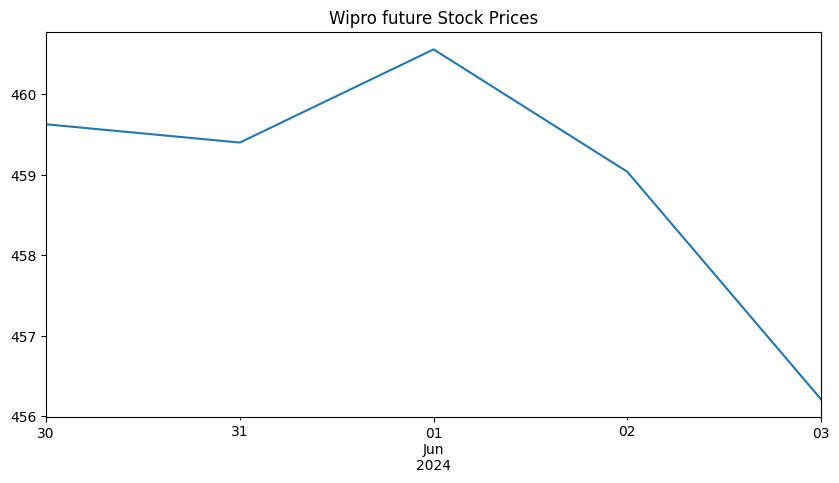

In [23]:
forecast["Price"].plot(figsize=(10,5),title="Wipro future Stock Prices",label="Close Price")
plt.show()